#  <h1 style="text-align:center;">Lab 2 Assignment: Simple Linear Regression</h1>

Aim: Write a script to implement following for the given Dataset Bengaluru/California /Boston Housing Dataset.

Data file: Bengaluru/ California/Boston  House price data 

Perform the following:

Exercise 1: Draw a scatter plot for the data mentioned for given attributes.

Exercise 2: Perform Data pre-processing.

Exercise 3: Performs gradient descent to learn `theta`. (using the library and without using the library). Compare the values of ‘theta’ in both cases.

Exercise 4: Splitting data into the training and testing, 60:40, 70:30, ND 80:20.

Exercise 5: Train linear regression model and test USING Gradient Descent and using the library. Find out the limitation in both cases.

Note- Consider X as Area of the House.

# Exercise 1: 

Draw a scatter plot for the data mentioned for given attributes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df1 = pd.read_csv(r"C:\Users\raval\Downloads\archive (1)\bengaluru_house_prices.csv")
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df= df1[["total_sqft","price"]]
df

,total_sqft,price
0,1056,39.07
1,2600,120.00
2,1440,62.00
3,1521,95.00
4,1200,51.00
...,...,...
13315,3453,231.00
13316,3600,400.00
13317,1141,60.00
13318,4689,488.00


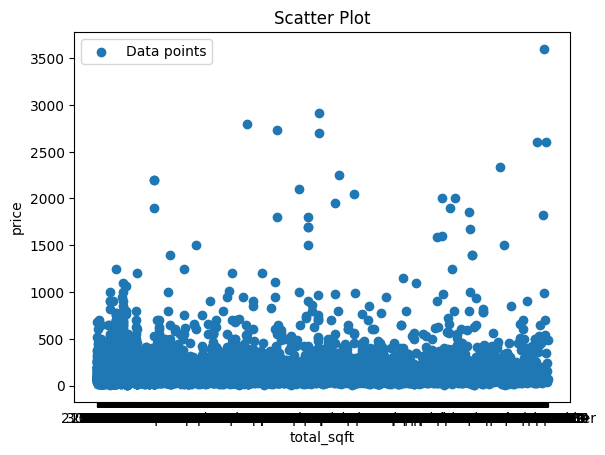

In [4]:
# Scatter plot
plt.scatter(df.total_sqft, df.price, label='Data points')
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.title('Scatter Plot')
plt.legend()
# plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

# Exercise 2: 

Perform Data pre-processing.

In [5]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [6]:
df2 = df.copy()
df2.total_sqft = df2.total_sqft.apply(convert_sqft_to_num)
df2 = df2[df2.total_sqft.notnull()]
df2

,total_sqft,price
0,1056.0,39.07
1,2600.0,120.00
2,1440.0,62.00
3,1521.0,95.00
4,1200.0,51.00
...,...,...
13315,3453.0,231.00
13316,3600.0,400.00
13317,1141.0,60.00
13318,4689.0,488.00


In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separate features and target
X = df2[['total_sqft']]
Y = df2['price']

# Normalization
normalizer = MinMaxScaler()
X_scaled_normalized = normalizer.fit_transform(X)

print("\nNormalized Data:")
print(X_scaled_normalized)


Normalized Data:
[[0.02018328]
 [0.04972164]
 [0.02752961]
 ...
 [0.02180942]
 [0.08968644]
 [0.01050296]]


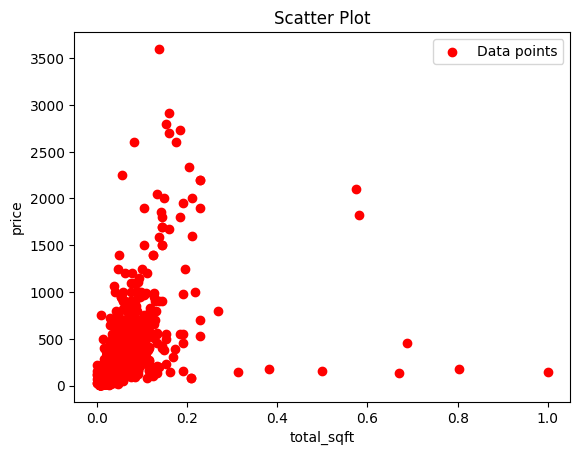

In [8]:
# Scatter plot
plt.scatter(X_scaled_normalized, Y, label='Data points',color="red")
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.title('Scatter Plot')
plt.legend()
# plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

# Exercise 3: 

Performs gradient descent to learn `theta`. (using the library and without using the library). Compare the values of ‘theta’ in both cases.

In [20]:
def gredient_descent(X,Y):
    theta_1=0
    theta_0=0

    l =0.001 #learning rate
    epochs = 10000 #number of iterations

    n = float(len(X))

    l1=[]
    l2=[]
    
    # printing gradient descent
    for i in range(epochs):
        Y_pred = theta_1*X + theta_0 
        
        # Calculate the Mean Squared Error (MSE)
        mse = (1/n) * sum((Y - Y_pred)**2)
        
        D_theta_1 = (-2/n)*sum(X*(Y-Y_pred))
        D_theta_0 = (-2/n)*sum(Y-Y_pred)
        theta_1 = theta_1 - l * D_theta_1
        theta_0 = theta_0 - l * D_theta_0
#         print("Epoch {}: theta_1 = {:.4f}, theta_0 = {:.4f}, MSE = {:.4f}".format(i + 1, theta_1, theta_0, mse))
        # Scatter plot
        
        l1.append(theta_1)
        l2.append(theta_0)
    plt.plot(l1, l2, label='Data points',color="green")
    plt.xlabel('theta_1')
    plt.ylabel('theta_0')
    plt.title('Scatter Plot')
    plt.legend()
    # plt.rcParams['figure.figsize'] = [15, 10]
    plt.show()

In [11]:
X_scaled_normalized_1d = X_scaled_normalized.reshape(-1)

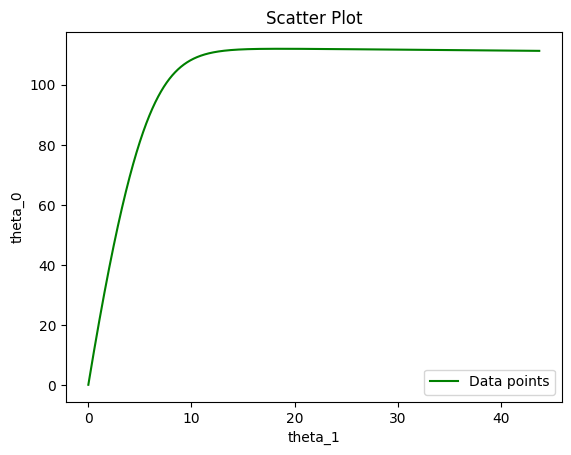

In [21]:
gredient_descent(X_scaled_normalized_1d,Y)

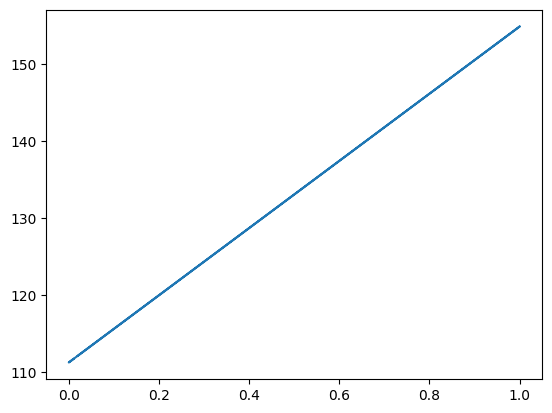

In [12]:
# theta_1 = 43.7053, theta_0 = 111.2103
# price = theta_1 * total_sqft + theta_0
p = 43.7053 * X_scaled_normalized_1d + 111.2103
plt.plot(X_scaled_normalized_1d,p)
plt.show()

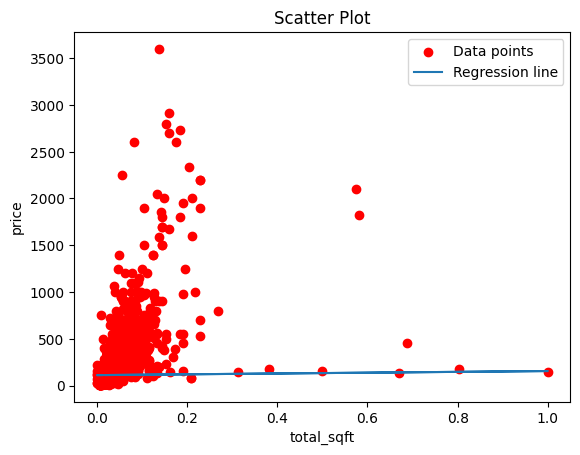

In [13]:
# Scatter plot
plt.scatter(X_scaled_normalized, Y, label='Data points',color="red")
plt.plot(X_scaled_normalized_1d,p,label="Regression line")
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.title('Scatter Plot')
plt.legend()
# plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

# using inbuilt library:

In [14]:
from sklearn.linear_model import SGDRegressor

# Create and train the model using SGD optimization
model = SGDRegressor(learning_rate='constant', eta0=0.001, max_iter=10000)
model.fit(X_scaled_normalized, Y)

SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=10000)

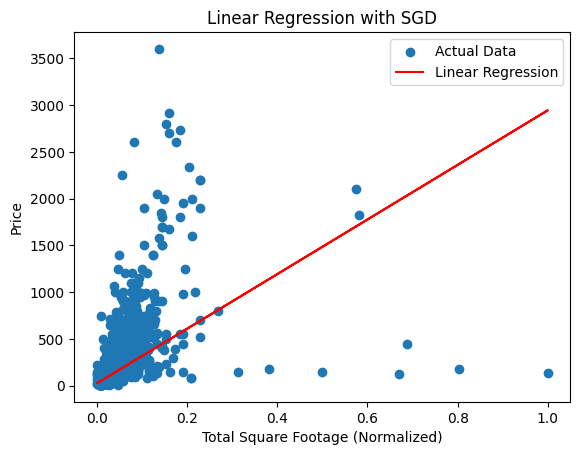

In [15]:
import matplotlib.pyplot as plt

# Generate predictions using the trained model
y_pred = model.predict(X_scaled_normalized)

# Visualize the data and the linear regression line
plt.scatter(X_scaled_normalized, Y, label='Actual Data')
plt.plot(X_scaled_normalized, y_pred, color='red', label='Linear Regression')
plt.xlabel('Total Square Footage (Normalized)')
plt.ylabel('Price')
plt.title('Linear Regression with SGD')
plt.legend()
plt.show()

In [16]:
slope = model.coef_[0]
intercept = model.intercept_

print("Slope:", slope)
print("Intercept:", intercept)

Slope: 2919.4195402891714
Intercept: [24.96516278]


In [17]:
def gredient_descent3(X,Y):
    theta_1=0
    theta_0=0

    l =0.1 #learning rate
    epochs = 15000 #number of iterations

    n = float(len(X))

    # printing gradient descent
    for i in range(epochs):
        Y_pred = theta_1*X + theta_0 
        
        # Calculate the Mean Squared Error (MSE)
        mse = (1/n) * sum((Y - Y_pred)**2)
        
        D_theta_1 = (-2/n)*sum(X*(Y-Y_pred))
        D_theta_0 = (-2/n)*sum(Y-Y_pred)
        theta_1 = theta_1 - l * D_theta_1
        theta_0 = theta_0 - l * D_theta_0
        print("Epoch {}: theta_1 = {:.4f}, theta_0 = {:.4f}, MSE = {:.4f}".format(i + 1, theta_1, theta_0, mse))

When we looked at the results from both the scikit-learn model and my custom code for gradient descent, I noticed that the slope and starting point of the line were a bit different. I figured out that the main reason was because of how I treated the "starting point" in my custom code. After making adjustments to my code to match how scikit-learn handles this, the results became more similar. This shows that when comparing different methods, it's important to make sure everything is done in the same way to get accurate results.

In [18]:
gredient_descent3(X_scaled_normalized_1d,Y)

Epoch 1: theta_1 = 1.0772, theta_0 = 22.4907, MSE = 34866.1247
Epoch 2: theta_1 = 2.0199, theta_0 = 40.4769, MSE = 30303.4718
Epoch 3: theta_1 = 2.8550, theta_0 = 54.8602, MSE = 27384.0794
Epoch 4: theta_1 = 3.6042, theta_0 = 66.3619, MSE = 25515.9060
Epoch 5: theta_1 = 4.2845, theta_0 = 75.5587, MSE = 24320.2137
Epoch 6: theta_1 = 4.9098, theta_0 = 82.9122, MSE = 23554.7180
Epoch 7: theta_1 = 5.4911, theta_0 = 88.7912, MSE = 23064.4258
Epoch 8: theta_1 = 6.0372, theta_0 = 93.4909, MSE = 22750.1857
Epoch 9: theta_1 = 6.5550, theta_0 = 97.2475, MSE = 22548.5689
Epoch 10: theta_1 = 7.0503, theta_0 = 100.2496, MSE = 22418.9991
Epoch 11: theta_1 = 7.5276, theta_0 = 102.6484, MSE = 22335.5190
Epoch 12: theta_1 = 7.9904, theta_0 = 104.5645, MSE = 22281.5233
Epoch 13: theta_1 = 8.4416, theta_0 = 106.0947, MSE = 22246.3894
Epoch 14: theta_1 = 8.8836, theta_0 = 107.3162, MSE = 22223.3218
Epoch 15: theta_1 = 9.3182, theta_0 = 108.2907, MSE = 22207.9734
Epoch 16: theta_1 = 9.7468, theta_0 = 109.0

Epoch 142: theta_1 = 60.5216, theta_0 = 110.7086, MSE = 21977.9249
Epoch 143: theta_1 = 60.9210, theta_0 = 110.6967, MSE = 21976.3282
Epoch 144: theta_1 = 61.3203, theta_0 = 110.6848, MSE = 21974.7319
Epoch 145: theta_1 = 61.7196, theta_0 = 110.6728, MSE = 21973.1360
Epoch 146: theta_1 = 62.1188, theta_0 = 110.6609, MSE = 21971.5404
Epoch 147: theta_1 = 62.5180, theta_0 = 110.6490, MSE = 21969.9452
Epoch 148: theta_1 = 62.9171, theta_0 = 110.6371, MSE = 21968.3503
Epoch 149: theta_1 = 63.3162, theta_0 = 110.6252, MSE = 21966.7558
Epoch 150: theta_1 = 63.7153, theta_0 = 110.6133, MSE = 21965.1617
Epoch 151: theta_1 = 64.1143, theta_0 = 110.6014, MSE = 21963.5679
Epoch 152: theta_1 = 64.5133, theta_0 = 110.5895, MSE = 21961.9745
Epoch 153: theta_1 = 64.9122, theta_0 = 110.5776, MSE = 21960.3814
Epoch 154: theta_1 = 65.3111, theta_0 = 110.5657, MSE = 21958.7887
Epoch 155: theta_1 = 65.7099, theta_0 = 110.5538, MSE = 21957.1963
Epoch 156: theta_1 = 66.1087, theta_0 = 110.5419, MSE = 21955.

Epoch 275: theta_1 = 113.2465, theta_0 = 109.1355, MSE = 21768.6835
Epoch 276: theta_1 = 113.6399, theta_0 = 109.1238, MSE = 21767.1338
Epoch 277: theta_1 = 114.0334, theta_0 = 109.1121, MSE = 21765.5844
Epoch 278: theta_1 = 114.4267, theta_0 = 109.1003, MSE = 21764.0354
Epoch 279: theta_1 = 114.8201, theta_0 = 109.0886, MSE = 21762.4867
Epoch 280: theta_1 = 115.2133, theta_0 = 109.0769, MSE = 21760.9384
Epoch 281: theta_1 = 115.6066, theta_0 = 109.0651, MSE = 21759.3904
Epoch 282: theta_1 = 115.9998, theta_0 = 109.0534, MSE = 21757.8428
Epoch 283: theta_1 = 116.3929, theta_0 = 109.0417, MSE = 21756.2955
Epoch 284: theta_1 = 116.7860, theta_0 = 109.0299, MSE = 21754.7485
Epoch 285: theta_1 = 117.1791, theta_0 = 109.0182, MSE = 21753.2020
Epoch 286: theta_1 = 117.5721, theta_0 = 109.0065, MSE = 21751.6557
Epoch 287: theta_1 = 117.9651, theta_0 = 108.9948, MSE = 21750.1098
Epoch 288: theta_1 = 118.3580, theta_0 = 108.9830, MSE = 21748.5643
Epoch 289: theta_1 = 118.7509, theta_0 = 108.971

Epoch 439: theta_1 = 177.1871, theta_0 = 107.2279, MSE = 21519.1200
Epoch 440: theta_1 = 177.5734, theta_0 = 107.2164, MSE = 21517.6262
Epoch 441: theta_1 = 177.9596, theta_0 = 107.2048, MSE = 21516.1328
Epoch 442: theta_1 = 178.3458, theta_0 = 107.1933, MSE = 21514.6398
Epoch 443: theta_1 = 178.7320, theta_0 = 107.1818, MSE = 21513.1470
Epoch 444: theta_1 = 179.1181, theta_0 = 107.1703, MSE = 21511.6546
Epoch 445: theta_1 = 179.5041, theta_0 = 107.1588, MSE = 21510.1626
Epoch 446: theta_1 = 179.8902, theta_0 = 107.1472, MSE = 21508.6708
Epoch 447: theta_1 = 180.2761, theta_0 = 107.1357, MSE = 21507.1794
Epoch 448: theta_1 = 180.6621, theta_0 = 107.1242, MSE = 21505.6884
Epoch 449: theta_1 = 181.0480, theta_0 = 107.1127, MSE = 21504.1976
Epoch 450: theta_1 = 181.4338, theta_0 = 107.1012, MSE = 21502.7072
Epoch 451: theta_1 = 181.8196, theta_0 = 107.0897, MSE = 21501.2172
Epoch 452: theta_1 = 182.2054, theta_0 = 107.0782, MSE = 21499.7274
Epoch 453: theta_1 = 182.5911, theta_0 = 107.066

Epoch 613: theta_1 = 243.7528, theta_0 = 105.2419, MSE = 21264.1874
Epoch 614: theta_1 = 244.1316, theta_0 = 105.2306, MSE = 21262.7508
Epoch 615: theta_1 = 244.5104, theta_0 = 105.2193, MSE = 21261.3146
Epoch 616: theta_1 = 244.8891, theta_0 = 105.2080, MSE = 21259.8786
Epoch 617: theta_1 = 245.2678, theta_0 = 105.1967, MSE = 21258.4431
Epoch 618: theta_1 = 245.6465, theta_0 = 105.1854, MSE = 21257.0078
Epoch 619: theta_1 = 246.0251, theta_0 = 105.1741, MSE = 21255.5728
Epoch 620: theta_1 = 246.4037, theta_0 = 105.1628, MSE = 21254.1382
Epoch 621: theta_1 = 246.7822, theta_0 = 105.1515, MSE = 21252.7039
Epoch 622: theta_1 = 247.1607, theta_0 = 105.1402, MSE = 21251.2699
Epoch 623: theta_1 = 247.5391, theta_0 = 105.1289, MSE = 21249.8362
Epoch 624: theta_1 = 247.9175, theta_0 = 105.1176, MSE = 21248.4029
Epoch 625: theta_1 = 248.2958, theta_0 = 105.1064, MSE = 21246.9699
Epoch 626: theta_1 = 248.6741, theta_0 = 105.0951, MSE = 21245.5372
Epoch 627: theta_1 = 249.0524, theta_0 = 105.083

Epoch 792: theta_1 = 310.8891, theta_0 = 103.2389, MSE = 21012.1088
Epoch 793: theta_1 = 311.2604, theta_0 = 103.2278, MSE = 21010.7288
Epoch 794: theta_1 = 311.6317, theta_0 = 103.2167, MSE = 21009.3491
Epoch 795: theta_1 = 312.0029, theta_0 = 103.2057, MSE = 21007.9697
Epoch 796: theta_1 = 312.3740, theta_0 = 103.1946, MSE = 21006.5906
Epoch 797: theta_1 = 312.7451, theta_0 = 103.1835, MSE = 21005.2118
Epoch 798: theta_1 = 313.1162, theta_0 = 103.1724, MSE = 21003.8333
Epoch 799: theta_1 = 313.4873, theta_0 = 103.1614, MSE = 21002.4551
Epoch 800: theta_1 = 313.8583, theta_0 = 103.1503, MSE = 21001.0773
Epoch 801: theta_1 = 314.2292, theta_0 = 103.1392, MSE = 20999.6997
Epoch 802: theta_1 = 314.6001, theta_0 = 103.1282, MSE = 20998.3225
Epoch 803: theta_1 = 314.9710, theta_0 = 103.1171, MSE = 20996.9456
Epoch 804: theta_1 = 315.3418, theta_0 = 103.1060, MSE = 20995.5690
Epoch 805: theta_1 = 315.7126, theta_0 = 103.0950, MSE = 20994.1926
Epoch 806: theta_1 = 316.0834, theta_0 = 103.083

Epoch 914: theta_1 = 355.8805, theta_0 = 101.8966, MSE = 20846.0105
Epoch 915: theta_1 = 356.2467, theta_0 = 101.8856, MSE = 20844.6677
Epoch 916: theta_1 = 356.6130, theta_0 = 101.8747, MSE = 20843.3253
Epoch 917: theta_1 = 356.9791, theta_0 = 101.8638, MSE = 20841.9831
Epoch 918: theta_1 = 357.3452, theta_0 = 101.8529, MSE = 20840.6412
Epoch 919: theta_1 = 357.7113, theta_0 = 101.8420, MSE = 20839.2997
Epoch 920: theta_1 = 358.0774, theta_0 = 101.8310, MSE = 20837.9584
Epoch 921: theta_1 = 358.4433, theta_0 = 101.8201, MSE = 20836.6174
Epoch 922: theta_1 = 358.8093, theta_0 = 101.8092, MSE = 20835.2768
Epoch 923: theta_1 = 359.1752, theta_0 = 101.7983, MSE = 20833.9364
Epoch 924: theta_1 = 359.5411, theta_0 = 101.7874, MSE = 20832.5964
Epoch 925: theta_1 = 359.9069, theta_0 = 101.7764, MSE = 20831.2566
Epoch 926: theta_1 = 360.2727, theta_0 = 101.7655, MSE = 20829.9172
Epoch 927: theta_1 = 360.6385, theta_0 = 101.7546, MSE = 20828.5780
Epoch 928: theta_1 = 361.0042, theta_0 = 101.743

Epoch 1084: theta_1 = 417.5556, theta_0 = 100.0565, MSE = 20622.0128
Epoch 1085: theta_1 = 417.9149, theta_0 = 100.0458, MSE = 20620.7203
Epoch 1086: theta_1 = 418.2742, theta_0 = 100.0351, MSE = 20619.4280
Epoch 1087: theta_1 = 418.6335, theta_0 = 100.0243, MSE = 20618.1361
Epoch 1088: theta_1 = 418.9927, theta_0 = 100.0136, MSE = 20616.8444
Epoch 1089: theta_1 = 419.3518, theta_0 = 100.0029, MSE = 20615.5531
Epoch 1090: theta_1 = 419.7110, theta_0 = 99.9922, MSE = 20614.2620
Epoch 1091: theta_1 = 420.0701, theta_0 = 99.9815, MSE = 20612.9712
Epoch 1092: theta_1 = 420.4291, theta_0 = 99.9708, MSE = 20611.6807
Epoch 1093: theta_1 = 420.7881, theta_0 = 99.9601, MSE = 20610.3905
Epoch 1094: theta_1 = 421.1471, theta_0 = 99.9494, MSE = 20609.1006
Epoch 1095: theta_1 = 421.5060, theta_0 = 99.9386, MSE = 20607.8110
Epoch 1096: theta_1 = 421.8649, theta_0 = 99.9279, MSE = 20606.5216
Epoch 1097: theta_1 = 422.2237, theta_0 = 99.9172, MSE = 20605.2326
Epoch 1098: theta_1 = 422.5825, theta_0 = 

Epoch 1262: theta_1 = 480.8851, theta_0 = 98.1671, MSE = 20396.4508
Epoch 1263: theta_1 = 481.2373, theta_0 = 98.1566, MSE = 20395.2089
Epoch 1264: theta_1 = 481.5895, theta_0 = 98.1461, MSE = 20393.9672
Epoch 1265: theta_1 = 481.9417, theta_0 = 98.1356, MSE = 20392.7259
Epoch 1266: theta_1 = 482.2938, theta_0 = 98.1250, MSE = 20391.4848
Epoch 1267: theta_1 = 482.6458, theta_0 = 98.1145, MSE = 20390.2439
Epoch 1268: theta_1 = 482.9979, theta_0 = 98.1040, MSE = 20389.0034
Epoch 1269: theta_1 = 483.3498, theta_0 = 98.0935, MSE = 20387.7631
Epoch 1270: theta_1 = 483.7018, theta_0 = 98.0830, MSE = 20386.5232
Epoch 1271: theta_1 = 484.0537, theta_0 = 98.0725, MSE = 20385.2835
Epoch 1272: theta_1 = 484.4056, theta_0 = 98.0620, MSE = 20384.0440
Epoch 1273: theta_1 = 484.7574, theta_0 = 98.0515, MSE = 20382.8049
Epoch 1274: theta_1 = 485.1092, theta_0 = 98.0410, MSE = 20381.5660
Epoch 1275: theta_1 = 485.4609, theta_0 = 98.0306, MSE = 20380.3274
Epoch 1276: theta_1 = 485.8126, theta_0 = 98.020

Epoch 1435: theta_1 = 541.2359, theta_0 = 96.3665, MSE = 20185.6885
Epoch 1436: theta_1 = 541.5814, theta_0 = 96.3562, MSE = 20184.4939
Epoch 1437: theta_1 = 541.9268, theta_0 = 96.3459, MSE = 20183.2995
Epoch 1438: theta_1 = 542.2721, theta_0 = 96.3356, MSE = 20182.1053
Epoch 1439: theta_1 = 542.6175, theta_0 = 96.3253, MSE = 20180.9115
Epoch 1440: theta_1 = 542.9628, theta_0 = 96.3150, MSE = 20179.7179
Epoch 1441: theta_1 = 543.3080, theta_0 = 96.3047, MSE = 20178.5246
Epoch 1442: theta_1 = 543.6533, theta_0 = 96.2944, MSE = 20177.3315
Epoch 1443: theta_1 = 543.9985, theta_0 = 96.2841, MSE = 20176.1387
Epoch 1444: theta_1 = 544.3436, theta_0 = 96.2738, MSE = 20174.9462
Epoch 1445: theta_1 = 544.6887, theta_0 = 96.2635, MSE = 20173.7540
Epoch 1446: theta_1 = 545.0338, theta_0 = 96.2532, MSE = 20172.5620
Epoch 1447: theta_1 = 545.3788, theta_0 = 96.2429, MSE = 20171.3703
Epoch 1448: theta_1 = 545.7238, theta_0 = 96.2326, MSE = 20170.1788
Epoch 1449: theta_1 = 546.0687, theta_0 = 96.222

Epoch 1601: theta_1 = 598.0542, theta_0 = 94.6713, MSE = 19991.0002
Epoch 1602: theta_1 = 598.3932, theta_0 = 94.6612, MSE = 19989.8492
Epoch 1603: theta_1 = 598.7323, theta_0 = 94.6511, MSE = 19988.6985
Epoch 1604: theta_1 = 599.0713, theta_0 = 94.6410, MSE = 19987.5480
Epoch 1605: theta_1 = 599.4103, theta_0 = 94.6309, MSE = 19986.3978
Epoch 1606: theta_1 = 599.7492, theta_0 = 94.6208, MSE = 19985.2478
Epoch 1607: theta_1 = 600.0881, theta_0 = 94.6107, MSE = 19984.0981
Epoch 1608: theta_1 = 600.4269, theta_0 = 94.6006, MSE = 19982.9487
Epoch 1609: theta_1 = 600.7658, theta_0 = 94.5904, MSE = 19981.7995
Epoch 1610: theta_1 = 601.1045, theta_0 = 94.5803, MSE = 19980.6506
Epoch 1611: theta_1 = 601.4433, theta_0 = 94.5702, MSE = 19979.5019
Epoch 1612: theta_1 = 601.7820, theta_0 = 94.5601, MSE = 19978.3535
Epoch 1613: theta_1 = 602.1207, theta_0 = 94.5500, MSE = 19977.2053
Epoch 1614: theta_1 = 602.4593, theta_0 = 94.5399, MSE = 19976.0574
Epoch 1615: theta_1 = 602.7979, theta_0 = 94.529

Epoch 1771: theta_1 = 655.1554, theta_0 = 92.9677, MSE = 19798.9940
Epoch 1772: theta_1 = 655.4881, theta_0 = 92.9578, MSE = 19797.8861
Epoch 1773: theta_1 = 655.8207, theta_0 = 92.9479, MSE = 19796.7784
Epoch 1774: theta_1 = 656.1534, theta_0 = 92.9380, MSE = 19795.6710
Epoch 1775: theta_1 = 656.4859, theta_0 = 92.9280, MSE = 19794.5638
Epoch 1776: theta_1 = 656.8184, theta_0 = 92.9181, MSE = 19793.4569
Epoch 1777: theta_1 = 657.1509, theta_0 = 92.9082, MSE = 19792.3502
Epoch 1778: theta_1 = 657.4834, theta_0 = 92.8983, MSE = 19791.2438
Epoch 1779: theta_1 = 657.8158, theta_0 = 92.8884, MSE = 19790.1376
Epoch 1780: theta_1 = 658.1482, theta_0 = 92.8784, MSE = 19789.0317
Epoch 1781: theta_1 = 658.4805, theta_0 = 92.8685, MSE = 19787.9260
Epoch 1782: theta_1 = 658.8128, theta_0 = 92.8586, MSE = 19786.8205
Epoch 1783: theta_1 = 659.1451, theta_0 = 92.8487, MSE = 19785.7153
Epoch 1784: theta_1 = 659.4773, theta_0 = 92.8388, MSE = 19784.6104
Epoch 1785: theta_1 = 659.8095, theta_0 = 92.828

Epoch 1892: theta_1 = 695.1399, theta_0 = 91.7748, MSE = 19666.7233
Epoch 1893: theta_1 = 695.4681, theta_0 = 91.7650, MSE = 19665.6450
Epoch 1894: theta_1 = 695.7963, theta_0 = 91.7552, MSE = 19664.5670
Epoch 1895: theta_1 = 696.1244, theta_0 = 91.7454, MSE = 19663.4892
Epoch 1896: theta_1 = 696.4525, theta_0 = 91.7356, MSE = 19662.4117
Epoch 1897: theta_1 = 696.7805, theta_0 = 91.7258, MSE = 19661.3344
Epoch 1898: theta_1 = 697.1085, theta_0 = 91.7161, MSE = 19660.2574
Epoch 1899: theta_1 = 697.4365, theta_0 = 91.7063, MSE = 19659.1806
Epoch 1900: theta_1 = 697.7644, theta_0 = 91.6965, MSE = 19658.1040
Epoch 1901: theta_1 = 698.0923, theta_0 = 91.6867, MSE = 19657.0277
Epoch 1902: theta_1 = 698.4202, theta_0 = 91.6769, MSE = 19655.9516
Epoch 1903: theta_1 = 698.7480, theta_0 = 91.6671, MSE = 19654.8758
Epoch 1904: theta_1 = 699.0758, theta_0 = 91.6574, MSE = 19653.8002
Epoch 1905: theta_1 = 699.4036, theta_0 = 91.6476, MSE = 19652.7248
Epoch 1906: theta_1 = 699.7313, theta_0 = 91.637

Epoch 2047: theta_1 = 745.5733, theta_0 = 90.2701, MSE = 19502.4471
Epoch 2048: theta_1 = 745.8958, theta_0 = 90.2605, MSE = 19501.4057
Epoch 2049: theta_1 = 746.2183, theta_0 = 90.2509, MSE = 19500.3645
Epoch 2050: theta_1 = 746.5408, theta_0 = 90.2413, MSE = 19499.3236
Epoch 2051: theta_1 = 746.8632, theta_0 = 90.2316, MSE = 19498.2829
Epoch 2052: theta_1 = 747.1856, theta_0 = 90.2220, MSE = 19497.2424
Epoch 2053: theta_1 = 747.5080, theta_0 = 90.2124, MSE = 19496.2022
Epoch 2054: theta_1 = 747.8303, theta_0 = 90.2028, MSE = 19495.1621
Epoch 2055: theta_1 = 748.1526, theta_0 = 90.1932, MSE = 19494.1224
Epoch 2056: theta_1 = 748.4748, theta_0 = 90.1836, MSE = 19493.0828
Epoch 2057: theta_1 = 748.7970, theta_0 = 90.1739, MSE = 19492.0435
Epoch 2058: theta_1 = 749.1192, theta_0 = 90.1643, MSE = 19491.0044
Epoch 2059: theta_1 = 749.4413, theta_0 = 90.1547, MSE = 19489.9656
Epoch 2060: theta_1 = 749.7635, theta_0 = 90.1451, MSE = 19488.9270
Epoch 2061: theta_1 = 750.0855, theta_0 = 90.135

Epoch 2196: theta_1 = 793.2348, theta_0 = 88.8481, MSE = 19349.8243
Epoch 2197: theta_1 = 793.5520, theta_0 = 88.8387, MSE = 19348.8171
Epoch 2198: theta_1 = 793.8692, theta_0 = 88.8292, MSE = 19347.8102
Epoch 2199: theta_1 = 794.1863, theta_0 = 88.8198, MSE = 19346.8034
Epoch 2200: theta_1 = 794.5034, theta_0 = 88.8103, MSE = 19345.7969
Epoch 2201: theta_1 = 794.8204, theta_0 = 88.8008, MSE = 19344.7907
Epoch 2202: theta_1 = 795.1374, theta_0 = 88.7914, MSE = 19343.7846
Epoch 2203: theta_1 = 795.4544, theta_0 = 88.7819, MSE = 19342.7788
Epoch 2204: theta_1 = 795.7714, theta_0 = 88.7725, MSE = 19341.7732
Epoch 2205: theta_1 = 796.0883, theta_0 = 88.7630, MSE = 19340.7678
Epoch 2206: theta_1 = 796.4051, theta_0 = 88.7536, MSE = 19339.7627
Epoch 2207: theta_1 = 796.7220, theta_0 = 88.7441, MSE = 19338.7578
Epoch 2208: theta_1 = 797.0388, theta_0 = 88.7347, MSE = 19337.7531
Epoch 2209: theta_1 = 797.3556, theta_0 = 88.7252, MSE = 19336.7486
Epoch 2210: theta_1 = 797.6723, theta_0 = 88.715

Epoch 2362: theta_1 = 845.4046, theta_0 = 87.2917, MSE = 19185.6889
Epoch 2363: theta_1 = 845.7160, theta_0 = 87.2824, MSE = 19184.7185
Epoch 2364: theta_1 = 846.0273, theta_0 = 87.2731, MSE = 19183.7484
Epoch 2365: theta_1 = 846.3385, theta_0 = 87.2638, MSE = 19182.7785
Epoch 2366: theta_1 = 846.6498, theta_0 = 87.2545, MSE = 19181.8087
Epoch 2367: theta_1 = 846.9610, theta_0 = 87.2452, MSE = 19180.8393
Epoch 2368: theta_1 = 847.2721, theta_0 = 87.2359, MSE = 19179.8700
Epoch 2369: theta_1 = 847.5833, theta_0 = 87.2267, MSE = 19178.9009
Epoch 2370: theta_1 = 847.8944, theta_0 = 87.2174, MSE = 19177.9321
Epoch 2371: theta_1 = 848.2054, theta_0 = 87.2081, MSE = 19176.9635
Epoch 2372: theta_1 = 848.5165, theta_0 = 87.1988, MSE = 19175.9950
Epoch 2373: theta_1 = 848.8275, theta_0 = 87.1895, MSE = 19175.0269
Epoch 2374: theta_1 = 849.1384, theta_0 = 87.1803, MSE = 19174.0589
Epoch 2375: theta_1 = 849.4493, theta_0 = 87.1710, MSE = 19173.0911
Epoch 2376: theta_1 = 849.7602, theta_0 = 87.161

Epoch 2484: theta_1 = 883.1317, theta_0 = 86.1661, MSE = 19068.8967
Epoch 2485: theta_1 = 883.4389, theta_0 = 86.1569, MSE = 19067.9525
Epoch 2486: theta_1 = 883.7459, theta_0 = 86.1478, MSE = 19067.0086
Epoch 2487: theta_1 = 884.0530, theta_0 = 86.1386, MSE = 19066.0648
Epoch 2488: theta_1 = 884.3600, theta_0 = 86.1294, MSE = 19065.1213
Epoch 2489: theta_1 = 884.6670, theta_0 = 86.1203, MSE = 19064.1780
Epoch 2490: theta_1 = 884.9739, theta_0 = 86.1111, MSE = 19063.2349
Epoch 2491: theta_1 = 885.2808, theta_0 = 86.1020, MSE = 19062.2920
Epoch 2492: theta_1 = 885.5877, theta_0 = 86.0928, MSE = 19061.3493
Epoch 2493: theta_1 = 885.8945, theta_0 = 86.0836, MSE = 19060.4068
Epoch 2494: theta_1 = 886.2013, theta_0 = 86.0745, MSE = 19059.4645
Epoch 2495: theta_1 = 886.5081, theta_0 = 86.0653, MSE = 19058.5225
Epoch 2496: theta_1 = 886.8148, theta_0 = 86.0562, MSE = 19057.5806
Epoch 2497: theta_1 = 887.1215, theta_0 = 86.0470, MSE = 19056.6390
Epoch 2498: theta_1 = 887.4282, theta_0 = 86.037

Epoch 2660: theta_1 = 936.6562, theta_0 = 84.5692, MSE = 18905.9425
Epoch 2661: theta_1 = 936.9573, theta_0 = 84.5602, MSE = 18905.0349
Epoch 2662: theta_1 = 937.2584, theta_0 = 84.5512, MSE = 18904.1275
Epoch 2663: theta_1 = 937.5594, theta_0 = 84.5422, MSE = 18903.2202
Epoch 2664: theta_1 = 937.8604, theta_0 = 84.5332, MSE = 18902.3132
Epoch 2665: theta_1 = 938.1614, theta_0 = 84.5243, MSE = 18901.4064
Epoch 2666: theta_1 = 938.4623, theta_0 = 84.5153, MSE = 18900.4998
Epoch 2667: theta_1 = 938.7633, theta_0 = 84.5063, MSE = 18899.5934
Epoch 2668: theta_1 = 939.0641, theta_0 = 84.4973, MSE = 18898.6872
Epoch 2669: theta_1 = 939.3650, theta_0 = 84.4884, MSE = 18897.7813
Epoch 2670: theta_1 = 939.6658, theta_0 = 84.4794, MSE = 18896.8755
Epoch 2671: theta_1 = 939.9665, theta_0 = 84.4704, MSE = 18895.9699
Epoch 2672: theta_1 = 940.2673, theta_0 = 84.4614, MSE = 18895.0645
Epoch 2673: theta_1 = 940.5680, theta_0 = 84.4525, MSE = 18894.1593
Epoch 2674: theta_1 = 940.8686, theta_0 = 84.443

Epoch 2830: theta_1 = 987.3624, theta_0 = 83.0564, MSE = 18754.5355
Epoch 2831: theta_1 = 987.6578, theta_0 = 83.0475, MSE = 18753.6618
Epoch 2832: theta_1 = 987.9532, theta_0 = 83.0387, MSE = 18752.7883
Epoch 2833: theta_1 = 988.2486, theta_0 = 83.0299, MSE = 18751.9151
Epoch 2834: theta_1 = 988.5439, theta_0 = 83.0211, MSE = 18751.0420
Epoch 2835: theta_1 = 988.8392, theta_0 = 83.0123, MSE = 18750.1691
Epoch 2836: theta_1 = 989.1344, theta_0 = 83.0035, MSE = 18749.2964
Epoch 2837: theta_1 = 989.4297, theta_0 = 82.9947, MSE = 18748.4240
Epoch 2838: theta_1 = 989.7249, theta_0 = 82.9859, MSE = 18747.5517
Epoch 2839: theta_1 = 990.0200, theta_0 = 82.9771, MSE = 18746.6796
Epoch 2840: theta_1 = 990.3151, theta_0 = 82.9683, MSE = 18745.8077
Epoch 2841: theta_1 = 990.6102, theta_0 = 82.9595, MSE = 18744.9360
Epoch 2842: theta_1 = 990.9053, theta_0 = 82.9507, MSE = 18744.0645
Epoch 2843: theta_1 = 991.2003, theta_0 = 82.9419, MSE = 18743.1932
Epoch 2844: theta_1 = 991.4953, theta_0 = 82.933

Epoch 2996: theta_1 = 1035.9513, theta_0 = 81.6067, MSE = 18612.1593
Epoch 2997: theta_1 = 1036.2412, theta_0 = 81.5981, MSE = 18611.3176
Epoch 2998: theta_1 = 1036.5312, theta_0 = 81.5894, MSE = 18610.4761
Epoch 2999: theta_1 = 1036.8211, theta_0 = 81.5808, MSE = 18609.6347
Epoch 3000: theta_1 = 1037.1110, theta_0 = 81.5721, MSE = 18608.7936
Epoch 3001: theta_1 = 1037.4008, theta_0 = 81.5635, MSE = 18607.9526
Epoch 3002: theta_1 = 1037.6906, theta_0 = 81.5548, MSE = 18607.1118
Epoch 3003: theta_1 = 1037.9804, theta_0 = 81.5462, MSE = 18606.2712
Epoch 3004: theta_1 = 1038.2701, theta_0 = 81.5375, MSE = 18605.4308
Epoch 3005: theta_1 = 1038.5598, theta_0 = 81.5289, MSE = 18604.5906
Epoch 3006: theta_1 = 1038.8495, theta_0 = 81.5202, MSE = 18603.7506
Epoch 3007: theta_1 = 1039.1392, theta_0 = 81.5116, MSE = 18602.9107
Epoch 3008: theta_1 = 1039.4288, theta_0 = 81.5030, MSE = 18602.0711
Epoch 3009: theta_1 = 1039.7184, theta_0 = 81.4943, MSE = 18601.2316
Epoch 3010: theta_1 = 1040.0079, t

Epoch 3156: theta_1 = 1081.9354, theta_0 = 80.2348, MSE = 18479.8569
Epoch 3157: theta_1 = 1082.2202, theta_0 = 80.2263, MSE = 18479.0449
Epoch 3158: theta_1 = 1082.5050, theta_0 = 80.2178, MSE = 18478.2330
Epoch 3159: theta_1 = 1082.7898, theta_0 = 80.2093, MSE = 18477.4213
Epoch 3160: theta_1 = 1083.0745, theta_0 = 80.2008, MSE = 18476.6098
Epoch 3161: theta_1 = 1083.3592, theta_0 = 80.1923, MSE = 18475.7985
Epoch 3162: theta_1 = 1083.6438, theta_0 = 80.1838, MSE = 18474.9874
Epoch 3163: theta_1 = 1083.9285, theta_0 = 80.1753, MSE = 18474.1764
Epoch 3164: theta_1 = 1084.2131, theta_0 = 80.1668, MSE = 18473.3656
Epoch 3165: theta_1 = 1084.4976, theta_0 = 80.1583, MSE = 18472.5550
Epoch 3166: theta_1 = 1084.7821, theta_0 = 80.1499, MSE = 18471.7446
Epoch 3167: theta_1 = 1085.0666, theta_0 = 80.1414, MSE = 18470.9344
Epoch 3168: theta_1 = 1085.3511, theta_0 = 80.1329, MSE = 18470.1244
Epoch 3169: theta_1 = 1085.6355, theta_0 = 80.1244, MSE = 18469.3145
Epoch 3170: theta_1 = 1085.9199, t

Epoch 3331: theta_1 = 1131.2947, theta_0 = 78.7622, MSE = 18340.4860
Epoch 3332: theta_1 = 1131.5740, theta_0 = 78.7538, MSE = 18339.7052
Epoch 3333: theta_1 = 1131.8532, theta_0 = 78.7455, MSE = 18338.9246
Epoch 3334: theta_1 = 1132.1324, theta_0 = 78.7372, MSE = 18338.1441
Epoch 3335: theta_1 = 1132.4116, theta_0 = 78.7288, MSE = 18337.3639
Epoch 3336: theta_1 = 1132.6907, theta_0 = 78.7205, MSE = 18336.5838
Epoch 3337: theta_1 = 1132.9699, theta_0 = 78.7122, MSE = 18335.8039
Epoch 3338: theta_1 = 1133.2490, theta_0 = 78.7038, MSE = 18335.0241
Epoch 3339: theta_1 = 1133.5280, theta_0 = 78.6955, MSE = 18334.2446
Epoch 3340: theta_1 = 1133.8070, theta_0 = 78.6872, MSE = 18333.4652
Epoch 3341: theta_1 = 1134.0860, theta_0 = 78.6789, MSE = 18332.6860
Epoch 3342: theta_1 = 1134.3650, theta_0 = 78.6706, MSE = 18331.9069
Epoch 3343: theta_1 = 1134.6439, theta_0 = 78.6622, MSE = 18331.1281
Epoch 3344: theta_1 = 1134.9228, theta_0 = 78.6539, MSE = 18330.3494
Epoch 3345: theta_1 = 1135.2017, t

Epoch 3483: theta_1 = 1173.3875, theta_0 = 77.5063, MSE = 18223.7936
Epoch 3484: theta_1 = 1173.6621, theta_0 = 77.4981, MSE = 18223.0390
Epoch 3485: theta_1 = 1173.9366, theta_0 = 77.4899, MSE = 18222.2845
Epoch 3486: theta_1 = 1174.2111, theta_0 = 77.4817, MSE = 18221.5302
Epoch 3487: theta_1 = 1174.4855, theta_0 = 77.4736, MSE = 18220.7761
Epoch 3488: theta_1 = 1174.7600, theta_0 = 77.4654, MSE = 18220.0222
Epoch 3489: theta_1 = 1175.0344, theta_0 = 77.4572, MSE = 18219.2684
Epoch 3490: theta_1 = 1175.3088, theta_0 = 77.4490, MSE = 18218.5148
Epoch 3491: theta_1 = 1175.5831, theta_0 = 77.4408, MSE = 18217.7614
Epoch 3492: theta_1 = 1175.8574, theta_0 = 77.4326, MSE = 18217.0081
Epoch 3493: theta_1 = 1176.1317, theta_0 = 77.4244, MSE = 18216.2550
Epoch 3494: theta_1 = 1176.4059, theta_0 = 77.4163, MSE = 18215.5021
Epoch 3495: theta_1 = 1176.6802, theta_0 = 77.4081, MSE = 18214.7494
Epoch 3496: theta_1 = 1176.9543, theta_0 = 77.3999, MSE = 18213.9968
Epoch 3497: theta_1 = 1177.2285, t

Epoch 3657: theta_1 = 1220.7000, theta_0 = 76.0948, MSE = 18095.0057
Epoch 3658: theta_1 = 1220.9692, theta_0 = 76.0867, MSE = 18094.2799
Epoch 3659: theta_1 = 1221.2384, theta_0 = 76.0787, MSE = 18093.5544
Epoch 3660: theta_1 = 1221.5076, theta_0 = 76.0707, MSE = 18092.8290
Epoch 3661: theta_1 = 1221.7768, theta_0 = 76.0626, MSE = 18092.1037
Epoch 3662: theta_1 = 1222.0459, theta_0 = 76.0546, MSE = 18091.3787
Epoch 3663: theta_1 = 1222.3150, theta_0 = 76.0466, MSE = 18090.6537
Epoch 3664: theta_1 = 1222.5841, theta_0 = 76.0385, MSE = 18089.9290
Epoch 3665: theta_1 = 1222.8531, theta_0 = 76.0305, MSE = 18089.2044
Epoch 3666: theta_1 = 1223.1221, theta_0 = 76.0225, MSE = 18088.4800
Epoch 3667: theta_1 = 1223.3911, theta_0 = 76.0145, MSE = 18087.7557
Epoch 3668: theta_1 = 1223.6601, theta_0 = 76.0064, MSE = 18087.0316
Epoch 3669: theta_1 = 1223.9290, theta_0 = 75.9984, MSE = 18086.3077
Epoch 3670: theta_1 = 1224.1979, theta_0 = 75.9904, MSE = 18085.5839
Epoch 3671: theta_1 = 1224.4667, t

Epoch 3781: theta_1 = 1253.8578, theta_0 = 75.1055, MSE = 18006.2455
Epoch 3782: theta_1 = 1254.1234, theta_0 = 75.0976, MSE = 18005.5397
Epoch 3783: theta_1 = 1254.3889, theta_0 = 75.0896, MSE = 18004.8340
Epoch 3784: theta_1 = 1254.6543, theta_0 = 75.0817, MSE = 18004.1285
Epoch 3785: theta_1 = 1254.9198, theta_0 = 75.0738, MSE = 18003.4232
Epoch 3786: theta_1 = 1255.1852, theta_0 = 75.0659, MSE = 18002.7180
Epoch 3787: theta_1 = 1255.4506, theta_0 = 75.0580, MSE = 18002.0129
Epoch 3788: theta_1 = 1255.7159, theta_0 = 75.0501, MSE = 18001.3081
Epoch 3789: theta_1 = 1255.9813, theta_0 = 75.0421, MSE = 18000.6034
Epoch 3790: theta_1 = 1256.2466, theta_0 = 75.0342, MSE = 17999.8988
Epoch 3791: theta_1 = 1256.5118, theta_0 = 75.0263, MSE = 17999.1944
Epoch 3792: theta_1 = 1256.7771, theta_0 = 75.0184, MSE = 17998.4902
Epoch 3793: theta_1 = 1257.0423, theta_0 = 75.0105, MSE = 17997.7861
Epoch 3794: theta_1 = 1257.3074, theta_0 = 75.0026, MSE = 17997.0822
Epoch 3795: theta_1 = 1257.5726, t

Epoch 3959: theta_1 = 1300.6565, theta_0 = 73.7093, MSE = 17883.0710
Epoch 3960: theta_1 = 1300.9168, theta_0 = 73.7015, MSE = 17882.3928
Epoch 3961: theta_1 = 1301.1770, theta_0 = 73.6937, MSE = 17881.7148
Epoch 3962: theta_1 = 1301.4373, theta_0 = 73.6860, MSE = 17881.0369
Epoch 3963: theta_1 = 1301.6975, theta_0 = 73.6782, MSE = 17880.3591
Epoch 3964: theta_1 = 1301.9576, theta_0 = 73.6704, MSE = 17879.6816
Epoch 3965: theta_1 = 1302.2178, theta_0 = 73.6627, MSE = 17879.0041
Epoch 3966: theta_1 = 1302.4779, theta_0 = 73.6549, MSE = 17878.3268
Epoch 3967: theta_1 = 1302.7379, theta_0 = 73.6472, MSE = 17877.6497
Epoch 3968: theta_1 = 1302.9980, theta_0 = 73.6394, MSE = 17876.9727
Epoch 3969: theta_1 = 1303.2580, theta_0 = 73.6316, MSE = 17876.2959
Epoch 3970: theta_1 = 1303.5180, theta_0 = 73.6239, MSE = 17875.6192
Epoch 3971: theta_1 = 1303.7780, theta_0 = 73.6161, MSE = 17874.9427
Epoch 3972: theta_1 = 1304.0379, theta_0 = 73.6084, MSE = 17874.2664
Epoch 3973: theta_1 = 1304.2978, t

Epoch 4079: theta_1 = 1331.6830, theta_0 = 72.7836, MSE = 17802.7645
Epoch 4080: theta_1 = 1331.9398, theta_0 = 72.7759, MSE = 17802.1044
Epoch 4081: theta_1 = 1332.1966, theta_0 = 72.7683, MSE = 17801.4443
Epoch 4082: theta_1 = 1332.4533, theta_0 = 72.7606, MSE = 17800.7844
Epoch 4083: theta_1 = 1332.7100, theta_0 = 72.7529, MSE = 17800.1247
Epoch 4084: theta_1 = 1332.9667, theta_0 = 72.7453, MSE = 17799.4651
Epoch 4085: theta_1 = 1333.2234, theta_0 = 72.7376, MSE = 17798.8057
Epoch 4086: theta_1 = 1333.4800, theta_0 = 72.7300, MSE = 17798.1464
Epoch 4087: theta_1 = 1333.7366, theta_0 = 72.7223, MSE = 17797.4872
Epoch 4088: theta_1 = 1333.9932, theta_0 = 72.7147, MSE = 17796.8282
Epoch 4089: theta_1 = 1334.2497, theta_0 = 72.7070, MSE = 17796.1694
Epoch 4090: theta_1 = 1334.5063, theta_0 = 72.6994, MSE = 17795.5107
Epoch 4091: theta_1 = 1334.7627, theta_0 = 72.6917, MSE = 17794.8521
Epoch 4092: theta_1 = 1335.0192, theta_0 = 72.6840, MSE = 17794.1937
Epoch 4093: theta_1 = 1335.2756, t

Epoch 4202: theta_1 = 1363.0547, theta_0 = 71.8476, MSE = 17722.6635
Epoch 4203: theta_1 = 1363.3080, theta_0 = 71.8401, MSE = 17722.0212
Epoch 4204: theta_1 = 1363.5613, theta_0 = 71.8325, MSE = 17721.3792
Epoch 4205: theta_1 = 1363.8145, theta_0 = 71.8249, MSE = 17720.7373
Epoch 4206: theta_1 = 1364.0677, theta_0 = 71.8174, MSE = 17720.0955
Epoch 4207: theta_1 = 1364.3209, theta_0 = 71.8098, MSE = 17719.4538
Epoch 4208: theta_1 = 1364.5740, theta_0 = 71.8023, MSE = 17718.8123
Epoch 4209: theta_1 = 1364.8271, theta_0 = 71.7947, MSE = 17718.1710
Epoch 4210: theta_1 = 1365.0802, theta_0 = 71.7872, MSE = 17717.5298
Epoch 4211: theta_1 = 1365.3333, theta_0 = 71.7796, MSE = 17716.8887
Epoch 4212: theta_1 = 1365.5863, theta_0 = 71.7721, MSE = 17716.2478
Epoch 4213: theta_1 = 1365.8393, theta_0 = 71.7645, MSE = 17715.6070
Epoch 4214: theta_1 = 1366.0923, theta_0 = 71.7570, MSE = 17714.9664
Epoch 4215: theta_1 = 1366.3452, theta_0 = 71.7494, MSE = 17714.3259
Epoch 4216: theta_1 = 1366.5981, t

Epoch 4327: theta_1 = 1394.4963, theta_0 = 70.9096, MSE = 17643.4929
Epoch 4328: theta_1 = 1394.7460, theta_0 = 70.9021, MSE = 17642.8685
Epoch 4329: theta_1 = 1394.9957, theta_0 = 70.8947, MSE = 17642.2442
Epoch 4330: theta_1 = 1395.2454, theta_0 = 70.8872, MSE = 17641.6200
Epoch 4331: theta_1 = 1395.4951, theta_0 = 70.8798, MSE = 17640.9960
Epoch 4332: theta_1 = 1395.7448, theta_0 = 70.8723, MSE = 17640.3721
Epoch 4333: theta_1 = 1395.9944, theta_0 = 70.8649, MSE = 17639.7483
Epoch 4334: theta_1 = 1396.2440, theta_0 = 70.8574, MSE = 17639.1247
Epoch 4335: theta_1 = 1396.4935, theta_0 = 70.8500, MSE = 17638.5012
Epoch 4336: theta_1 = 1396.7431, theta_0 = 70.8425, MSE = 17637.8779
Epoch 4337: theta_1 = 1396.9926, theta_0 = 70.8351, MSE = 17637.2547
Epoch 4338: theta_1 = 1397.2421, theta_0 = 70.8276, MSE = 17636.6316
Epoch 4339: theta_1 = 1397.4915, theta_0 = 70.8202, MSE = 17636.0087
Epoch 4340: theta_1 = 1397.7409, theta_0 = 70.8128, MSE = 17635.3859
Epoch 4341: theta_1 = 1397.9903, t

Epoch 4449: theta_1 = 1424.7610, theta_0 = 70.0066, MSE = 17568.3339
Epoch 4450: theta_1 = 1425.0074, theta_0 = 69.9993, MSE = 17567.7263
Epoch 4451: theta_1 = 1425.2537, theta_0 = 69.9919, MSE = 17567.1189
Epoch 4452: theta_1 = 1425.5000, theta_0 = 69.9846, MSE = 17566.5115
Epoch 4453: theta_1 = 1425.7463, theta_0 = 69.9772, MSE = 17565.9044
Epoch 4454: theta_1 = 1425.9926, theta_0 = 69.9699, MSE = 17565.2973
Epoch 4455: theta_1 = 1426.2388, theta_0 = 69.9625, MSE = 17564.6904
Epoch 4456: theta_1 = 1426.4850, theta_0 = 69.9552, MSE = 17564.0836
Epoch 4457: theta_1 = 1426.7312, theta_0 = 69.9478, MSE = 17563.4770
Epoch 4458: theta_1 = 1426.9773, theta_0 = 69.9405, MSE = 17562.8705
Epoch 4459: theta_1 = 1427.2234, theta_0 = 69.9331, MSE = 17562.2641
Epoch 4460: theta_1 = 1427.4695, theta_0 = 69.9258, MSE = 17561.6578
Epoch 4461: theta_1 = 1427.7156, theta_0 = 69.9185, MSE = 17561.0517
Epoch 4462: theta_1 = 1427.9616, theta_0 = 69.9111, MSE = 17560.4458
Epoch 4463: theta_1 = 1428.2076, t

Epoch 4577: theta_1 = 1456.0722, theta_0 = 69.0724, MSE = 17491.6587
Epoch 4578: theta_1 = 1456.3150, theta_0 = 69.0652, MSE = 17491.0683
Epoch 4579: theta_1 = 1456.5578, theta_0 = 69.0580, MSE = 17490.4781
Epoch 4580: theta_1 = 1456.8006, theta_0 = 69.0507, MSE = 17489.8879
Epoch 4581: theta_1 = 1457.0434, theta_0 = 69.0435, MSE = 17489.2979
Epoch 4582: theta_1 = 1457.2862, theta_0 = 69.0362, MSE = 17488.7081
Epoch 4583: theta_1 = 1457.5289, theta_0 = 69.0290, MSE = 17488.1183
Epoch 4584: theta_1 = 1457.7716, theta_0 = 69.0217, MSE = 17487.5287
Epoch 4585: theta_1 = 1458.0142, theta_0 = 69.0145, MSE = 17486.9392
Epoch 4586: theta_1 = 1458.2569, theta_0 = 69.0073, MSE = 17486.3499
Epoch 4587: theta_1 = 1458.4995, theta_0 = 69.0000, MSE = 17485.7607
Epoch 4588: theta_1 = 1458.7421, theta_0 = 68.9928, MSE = 17485.1716
Epoch 4589: theta_1 = 1458.9846, theta_0 = 68.9856, MSE = 17484.5827
Epoch 4590: theta_1 = 1459.2271, theta_0 = 68.9783, MSE = 17483.9938
Epoch 4591: theta_1 = 1459.4696, t

Epoch 4696: theta_1 = 1484.7813, theta_0 = 68.2159, MSE = 17422.3228
Epoch 4697: theta_1 = 1485.0209, theta_0 = 68.2088, MSE = 17421.7479
Epoch 4698: theta_1 = 1485.2605, theta_0 = 68.2016, MSE = 17421.1732
Epoch 4699: theta_1 = 1485.5001, theta_0 = 68.1945, MSE = 17420.5986
Epoch 4700: theta_1 = 1485.7396, theta_0 = 68.1873, MSE = 17420.0242
Epoch 4701: theta_1 = 1485.9792, theta_0 = 68.1802, MSE = 17419.4498
Epoch 4702: theta_1 = 1486.2187, theta_0 = 68.1730, MSE = 17418.8756
Epoch 4703: theta_1 = 1486.4581, theta_0 = 68.1659, MSE = 17418.3016
Epoch 4704: theta_1 = 1486.6976, theta_0 = 68.1587, MSE = 17417.7276
Epoch 4705: theta_1 = 1486.9370, theta_0 = 68.1516, MSE = 17417.1538
Epoch 4706: theta_1 = 1487.1764, theta_0 = 68.1445, MSE = 17416.5801
Epoch 4707: theta_1 = 1487.4158, theta_0 = 68.1373, MSE = 17416.0065
Epoch 4708: theta_1 = 1487.6551, theta_0 = 68.1302, MSE = 17415.4331
Epoch 4709: theta_1 = 1487.8944, theta_0 = 68.1230, MSE = 17414.8598
Epoch 4710: theta_1 = 1488.1337, t

Epoch 4824: theta_1 = 1515.2369, theta_0 = 67.3073, MSE = 17349.7804
Epoch 4825: theta_1 = 1515.4731, theta_0 = 67.3002, MSE = 17349.2218
Epoch 4826: theta_1 = 1515.7093, theta_0 = 67.2932, MSE = 17348.6634
Epoch 4827: theta_1 = 1515.9455, theta_0 = 67.2861, MSE = 17348.1050
Epoch 4828: theta_1 = 1516.1816, theta_0 = 67.2791, MSE = 17347.5468
Epoch 4829: theta_1 = 1516.4177, theta_0 = 67.2720, MSE = 17346.9888
Epoch 4830: theta_1 = 1516.6538, theta_0 = 67.2650, MSE = 17346.4308
Epoch 4831: theta_1 = 1516.8899, theta_0 = 67.2580, MSE = 17345.8730
Epoch 4832: theta_1 = 1517.1259, theta_0 = 67.2509, MSE = 17345.3153
Epoch 4833: theta_1 = 1517.3619, theta_0 = 67.2439, MSE = 17344.7577
Epoch 4834: theta_1 = 1517.5979, theta_0 = 67.2368, MSE = 17344.2003
Epoch 4835: theta_1 = 1517.8338, theta_0 = 67.2298, MSE = 17343.6429
Epoch 4836: theta_1 = 1518.0698, theta_0 = 67.2227, MSE = 17343.0857
Epoch 4837: theta_1 = 1518.3057, theta_0 = 67.2157, MSE = 17342.5287
Epoch 4838: theta_1 = 1518.5415, t

Epoch 4946: theta_1 = 1543.8608, theta_0 = 66.4533, MSE = 17282.5505
Epoch 4947: theta_1 = 1544.0938, theta_0 = 66.4463, MSE = 17282.0070
Epoch 4948: theta_1 = 1544.3267, theta_0 = 66.4394, MSE = 17281.4636
Epoch 4949: theta_1 = 1544.5597, theta_0 = 66.4324, MSE = 17280.9203
Epoch 4950: theta_1 = 1544.7926, theta_0 = 66.4255, MSE = 17280.3772
Epoch 4951: theta_1 = 1545.0255, theta_0 = 66.4185, MSE = 17279.8342
Epoch 4952: theta_1 = 1545.2584, theta_0 = 66.4116, MSE = 17279.2913
Epoch 4953: theta_1 = 1545.4913, theta_0 = 66.4046, MSE = 17278.7485
Epoch 4954: theta_1 = 1545.7241, theta_0 = 66.3977, MSE = 17278.2059
Epoch 4955: theta_1 = 1545.9569, theta_0 = 66.3907, MSE = 17277.6634
Epoch 4956: theta_1 = 1546.1896, theta_0 = 66.3838, MSE = 17277.1210
Epoch 4957: theta_1 = 1546.4224, theta_0 = 66.3769, MSE = 17276.5787
Epoch 4958: theta_1 = 1546.6551, theta_0 = 66.3699, MSE = 17276.0365
Epoch 4959: theta_1 = 1546.8878, theta_0 = 66.3630, MSE = 17275.4945
Epoch 4960: theta_1 = 1547.1205, t

Epoch 5072: theta_1 = 1573.0148, theta_0 = 65.5835, MSE = 17215.0209
Epoch 5073: theta_1 = 1573.2445, theta_0 = 65.5766, MSE = 17214.4925
Epoch 5074: theta_1 = 1573.4743, theta_0 = 65.5698, MSE = 17213.9643
Epoch 5075: theta_1 = 1573.7039, theta_0 = 65.5629, MSE = 17213.4362
Epoch 5076: theta_1 = 1573.9336, theta_0 = 65.5561, MSE = 17212.9082
Epoch 5077: theta_1 = 1574.1632, theta_0 = 65.5492, MSE = 17212.3803
Epoch 5078: theta_1 = 1574.3928, theta_0 = 65.5424, MSE = 17211.8525
Epoch 5079: theta_1 = 1574.6224, theta_0 = 65.5355, MSE = 17211.3249
Epoch 5080: theta_1 = 1574.8520, theta_0 = 65.5287, MSE = 17210.7974
Epoch 5081: theta_1 = 1575.0815, theta_0 = 65.5218, MSE = 17210.2700
Epoch 5082: theta_1 = 1575.3110, theta_0 = 65.5150, MSE = 17209.7427
Epoch 5083: theta_1 = 1575.5405, theta_0 = 65.5081, MSE = 17209.2155
Epoch 5084: theta_1 = 1575.7700, theta_0 = 65.5013, MSE = 17208.6885
Epoch 5085: theta_1 = 1575.9994, theta_0 = 65.4944, MSE = 17208.1615
Epoch 5086: theta_1 = 1576.2288, t

Epoch 5197: theta_1 = 1601.5332, theta_0 = 64.7326, MSE = 17149.8870
Epoch 5198: theta_1 = 1601.7598, theta_0 = 64.7259, MSE = 17149.3732
Epoch 5199: theta_1 = 1601.9863, theta_0 = 64.7191, MSE = 17148.8596
Epoch 5200: theta_1 = 1602.2128, theta_0 = 64.7123, MSE = 17148.3461
Epoch 5201: theta_1 = 1602.4392, theta_0 = 64.7056, MSE = 17147.8327
Epoch 5202: theta_1 = 1602.6657, theta_0 = 64.6988, MSE = 17147.3194
Epoch 5203: theta_1 = 1602.8921, theta_0 = 64.6921, MSE = 17146.8063
Epoch 5204: theta_1 = 1603.1185, theta_0 = 64.6853, MSE = 17146.2932
Epoch 5205: theta_1 = 1603.3448, theta_0 = 64.6786, MSE = 17145.7803
Epoch 5206: theta_1 = 1603.5711, theta_0 = 64.6718, MSE = 17145.2675
Epoch 5207: theta_1 = 1603.7975, theta_0 = 64.6651, MSE = 17144.7548
Epoch 5208: theta_1 = 1604.0237, theta_0 = 64.6583, MSE = 17144.2422
Epoch 5209: theta_1 = 1604.2500, theta_0 = 64.6516, MSE = 17143.7297
Epoch 5210: theta_1 = 1604.4762, theta_0 = 64.6448, MSE = 17143.2173
Epoch 5211: theta_1 = 1604.7024, t

Epoch 5319: theta_1 = 1628.9843, theta_0 = 63.9136, MSE = 17088.0534
Epoch 5320: theta_1 = 1629.2077, theta_0 = 63.9070, MSE = 17087.5535
Epoch 5321: theta_1 = 1629.4312, theta_0 = 63.9003, MSE = 17087.0537
Epoch 5322: theta_1 = 1629.6546, theta_0 = 63.8936, MSE = 17086.5541
Epoch 5323: theta_1 = 1629.8780, theta_0 = 63.8870, MSE = 17086.0546
Epoch 5324: theta_1 = 1630.1013, theta_0 = 63.8803, MSE = 17085.5551
Epoch 5325: theta_1 = 1630.3247, theta_0 = 63.8736, MSE = 17085.0558
Epoch 5326: theta_1 = 1630.5480, theta_0 = 63.8670, MSE = 17084.5566
Epoch 5327: theta_1 = 1630.7712, theta_0 = 63.8603, MSE = 17084.0575
Epoch 5328: theta_1 = 1630.9945, theta_0 = 63.8536, MSE = 17083.5586
Epoch 5329: theta_1 = 1631.2177, theta_0 = 63.8470, MSE = 17083.0597
Epoch 5330: theta_1 = 1631.4410, theta_0 = 63.8403, MSE = 17082.5609
Epoch 5331: theta_1 = 1631.6641, theta_0 = 63.8337, MSE = 17082.0623
Epoch 5332: theta_1 = 1631.8873, theta_0 = 63.8270, MSE = 17081.5638
Epoch 5333: theta_1 = 1632.1104, t

Epoch 5441: theta_1 = 1656.0623, theta_0 = 63.1058, MSE = 17027.8890
Epoch 5442: theta_1 = 1656.2827, theta_0 = 63.0992, MSE = 17027.4027
Epoch 5443: theta_1 = 1656.5031, theta_0 = 63.0926, MSE = 17026.9164
Epoch 5444: theta_1 = 1656.7235, theta_0 = 63.0860, MSE = 17026.4302
Epoch 5445: theta_1 = 1656.9438, theta_0 = 63.0795, MSE = 17025.9442
Epoch 5446: theta_1 = 1657.1641, theta_0 = 63.0729, MSE = 17025.4582
Epoch 5447: theta_1 = 1657.3844, theta_0 = 63.0663, MSE = 17024.9724
Epoch 5448: theta_1 = 1657.6047, theta_0 = 63.0597, MSE = 17024.4867
Epoch 5449: theta_1 = 1657.8250, theta_0 = 63.0532, MSE = 17024.0011
Epoch 5450: theta_1 = 1658.0452, theta_0 = 63.0466, MSE = 17023.5156
Epoch 5451: theta_1 = 1658.2654, theta_0 = 63.0400, MSE = 17023.0302
Epoch 5452: theta_1 = 1658.4856, theta_0 = 63.0335, MSE = 17022.5449
Epoch 5453: theta_1 = 1658.7057, theta_0 = 63.0269, MSE = 17022.0597
Epoch 5454: theta_1 = 1658.9258, theta_0 = 63.0203, MSE = 17021.5746
Epoch 5455: theta_1 = 1659.1459, t

Epoch 5571: theta_1 = 1684.5110, theta_0 = 62.2570, MSE = 16965.5659
Epoch 5572: theta_1 = 1684.7282, theta_0 = 62.2505, MSE = 16965.0935
Epoch 5573: theta_1 = 1684.9454, theta_0 = 62.2440, MSE = 16964.6212
Epoch 5574: theta_1 = 1685.1626, theta_0 = 62.2375, MSE = 16964.1490
Epoch 5575: theta_1 = 1685.3798, theta_0 = 62.2311, MSE = 16963.6769
Epoch 5576: theta_1 = 1685.5969, theta_0 = 62.2246, MSE = 16963.2049
Epoch 5577: theta_1 = 1685.8140, theta_0 = 62.2181, MSE = 16962.7331
Epoch 5578: theta_1 = 1686.0311, theta_0 = 62.2116, MSE = 16962.2613
Epoch 5579: theta_1 = 1686.2482, theta_0 = 62.2052, MSE = 16961.7896
Epoch 5580: theta_1 = 1686.4652, theta_0 = 62.1987, MSE = 16961.3181
Epoch 5581: theta_1 = 1686.6822, theta_0 = 62.1922, MSE = 16960.8466
Epoch 5582: theta_1 = 1686.8992, theta_0 = 62.1857, MSE = 16960.3753
Epoch 5583: theta_1 = 1687.1162, theta_0 = 62.1793, MSE = 16959.9041
Epoch 5584: theta_1 = 1687.3331, theta_0 = 62.1728, MSE = 16959.4329
Epoch 5585: theta_1 = 1687.5500, t

Epoch 5695: theta_1 = 1711.2629, theta_0 = 61.4588, MSE = 16907.7890
Epoch 5696: theta_1 = 1711.4771, theta_0 = 61.4525, MSE = 16907.3296
Epoch 5697: theta_1 = 1711.6913, theta_0 = 61.4461, MSE = 16906.8702
Epoch 5698: theta_1 = 1711.9055, theta_0 = 61.4397, MSE = 16906.4110
Epoch 5699: theta_1 = 1712.1197, theta_0 = 61.4333, MSE = 16905.9519
Epoch 5700: theta_1 = 1712.3338, theta_0 = 61.4269, MSE = 16905.4928
Epoch 5701: theta_1 = 1712.5479, theta_0 = 61.4205, MSE = 16905.0339
Epoch 5702: theta_1 = 1712.7620, theta_0 = 61.4141, MSE = 16904.5751
Epoch 5703: theta_1 = 1712.9761, theta_0 = 61.4077, MSE = 16904.1164
Epoch 5704: theta_1 = 1713.1901, theta_0 = 61.4013, MSE = 16903.6578
Epoch 5705: theta_1 = 1713.4041, theta_0 = 61.3950, MSE = 16903.1992
Epoch 5706: theta_1 = 1713.6181, theta_0 = 61.3886, MSE = 16902.7408
Epoch 5707: theta_1 = 1713.8321, theta_0 = 61.3822, MSE = 16902.2825
Epoch 5708: theta_1 = 1714.0460, theta_0 = 61.3758, MSE = 16901.8243
Epoch 5709: theta_1 = 1714.2599, t

Epoch 5814: theta_1 = 1736.5886, theta_0 = 60.7033, MSE = 16853.8328
Epoch 5815: theta_1 = 1736.8000, theta_0 = 60.6970, MSE = 16853.3855
Epoch 5816: theta_1 = 1737.0113, theta_0 = 60.6906, MSE = 16852.9382
Epoch 5817: theta_1 = 1737.2227, theta_0 = 60.6843, MSE = 16852.4911
Epoch 5818: theta_1 = 1737.4340, theta_0 = 60.6780, MSE = 16852.0441
Epoch 5819: theta_1 = 1737.6453, theta_0 = 60.6717, MSE = 16851.5971
Epoch 5820: theta_1 = 1737.8566, theta_0 = 60.6654, MSE = 16851.1503
Epoch 5821: theta_1 = 1738.0678, theta_0 = 60.6591, MSE = 16850.7035
Epoch 5822: theta_1 = 1738.2790, theta_0 = 60.6528, MSE = 16850.2569
Epoch 5823: theta_1 = 1738.4902, theta_0 = 60.6465, MSE = 16849.8104
Epoch 5824: theta_1 = 1738.7014, theta_0 = 60.6402, MSE = 16849.3639
Epoch 5825: theta_1 = 1738.9126, theta_0 = 60.6339, MSE = 16848.9176
Epoch 5826: theta_1 = 1739.1237, theta_0 = 60.6276, MSE = 16848.4714
Epoch 5827: theta_1 = 1739.3348, theta_0 = 60.6213, MSE = 16848.0252
Epoch 5828: theta_1 = 1739.5459, t

Epoch 5938: theta_1 = 1762.6212, theta_0 = 59.9266, MSE = 16799.1211
Epoch 5939: theta_1 = 1762.8297, theta_0 = 59.9204, MSE = 16798.6860
Epoch 5940: theta_1 = 1763.0381, theta_0 = 59.9141, MSE = 16798.2510
Epoch 5941: theta_1 = 1763.2465, theta_0 = 59.9079, MSE = 16797.8162
Epoch 5942: theta_1 = 1763.4549, theta_0 = 59.9017, MSE = 16797.3814
Epoch 5943: theta_1 = 1763.6633, theta_0 = 59.8955, MSE = 16796.9467
Epoch 5944: theta_1 = 1763.8717, theta_0 = 59.8893, MSE = 16796.5121
Epoch 5945: theta_1 = 1764.0800, theta_0 = 59.8831, MSE = 16796.0776
Epoch 5946: theta_1 = 1764.2883, theta_0 = 59.8768, MSE = 16795.6433
Epoch 5947: theta_1 = 1764.4966, theta_0 = 59.8706, MSE = 16795.2090
Epoch 5948: theta_1 = 1764.7049, theta_0 = 59.8644, MSE = 16794.7748
Epoch 5949: theta_1 = 1764.9131, theta_0 = 59.8582, MSE = 16794.3407
Epoch 5950: theta_1 = 1765.1213, theta_0 = 59.8520, MSE = 16793.9067
Epoch 5951: theta_1 = 1765.3295, theta_0 = 59.8458, MSE = 16793.4728
Epoch 5952: theta_1 = 1765.5377, t

Epoch 6061: theta_1 = 1788.0886, theta_0 = 59.1668, MSE = 16746.3334
Epoch 6062: theta_1 = 1788.2943, theta_0 = 59.1606, MSE = 16745.9102
Epoch 6063: theta_1 = 1788.4998, theta_0 = 59.1545, MSE = 16745.4871
Epoch 6064: theta_1 = 1788.7054, theta_0 = 59.1484, MSE = 16745.0640
Epoch 6065: theta_1 = 1788.9110, theta_0 = 59.1422, MSE = 16744.6411
Epoch 6066: theta_1 = 1789.1165, theta_0 = 59.1361, MSE = 16744.2182
Epoch 6067: theta_1 = 1789.3220, theta_0 = 59.1300, MSE = 16743.7955
Epoch 6068: theta_1 = 1789.5275, theta_0 = 59.1238, MSE = 16743.3728
Epoch 6069: theta_1 = 1789.7329, theta_0 = 59.1177, MSE = 16742.9503
Epoch 6070: theta_1 = 1789.9384, theta_0 = 59.1116, MSE = 16742.5278
Epoch 6071: theta_1 = 1790.1438, theta_0 = 59.1054, MSE = 16742.1054
Epoch 6072: theta_1 = 1790.3491, theta_0 = 59.0993, MSE = 16741.6831
Epoch 6073: theta_1 = 1790.5545, theta_0 = 59.0932, MSE = 16741.2610
Epoch 6074: theta_1 = 1790.7598, theta_0 = 59.0871, MSE = 16740.8389
Epoch 6075: theta_1 = 1790.9652, t

Epoch 6235: theta_1 = 1823.5210, theta_0 = 58.1096, MSE = 16674.1025
Epoch 6236: theta_1 = 1823.7226, theta_0 = 58.1036, MSE = 16673.6955
Epoch 6237: theta_1 = 1823.9242, theta_0 = 58.0976, MSE = 16673.2886
Epoch 6238: theta_1 = 1824.1258, theta_0 = 58.0916, MSE = 16672.8817
Epoch 6239: theta_1 = 1824.3274, theta_0 = 58.0856, MSE = 16672.4750
Epoch 6240: theta_1 = 1824.5289, theta_0 = 58.0796, MSE = 16672.0683
Epoch 6241: theta_1 = 1824.7305, theta_0 = 58.0736, MSE = 16671.6617
Epoch 6242: theta_1 = 1824.9320, theta_0 = 58.0675, MSE = 16671.2552
Epoch 6243: theta_1 = 1825.1335, theta_0 = 58.0615, MSE = 16670.8489
Epoch 6244: theta_1 = 1825.3349, theta_0 = 58.0555, MSE = 16670.4426
Epoch 6245: theta_1 = 1825.5364, theta_0 = 58.0495, MSE = 16670.0364
Epoch 6246: theta_1 = 1825.7378, theta_0 = 58.0435, MSE = 16669.6302
Epoch 6247: theta_1 = 1825.9392, theta_0 = 58.0375, MSE = 16669.2242
Epoch 6248: theta_1 = 1826.1405, theta_0 = 58.0315, MSE = 16668.8183
Epoch 6249: theta_1 = 1826.3419, t

Epoch 6393: theta_1 = 1855.1015, theta_0 = 57.1674, MSE = 16610.9117
Epoch 6394: theta_1 = 1855.2996, theta_0 = 57.1615, MSE = 16610.5188
Epoch 6395: theta_1 = 1855.4977, theta_0 = 57.1556, MSE = 16610.1260
Epoch 6396: theta_1 = 1855.6958, theta_0 = 57.1497, MSE = 16609.7334
Epoch 6397: theta_1 = 1855.8938, theta_0 = 57.1438, MSE = 16609.3408
Epoch 6398: theta_1 = 1856.0918, theta_0 = 57.1379, MSE = 16608.9483
Epoch 6399: theta_1 = 1856.2898, theta_0 = 57.1320, MSE = 16608.5559
Epoch 6400: theta_1 = 1856.4878, theta_0 = 57.1261, MSE = 16608.1635
Epoch 6401: theta_1 = 1856.6857, theta_0 = 57.1202, MSE = 16607.7713
Epoch 6402: theta_1 = 1856.8836, theta_0 = 57.1143, MSE = 16607.3792
Epoch 6403: theta_1 = 1857.0815, theta_0 = 57.1084, MSE = 16606.9871
Epoch 6404: theta_1 = 1857.2794, theta_0 = 57.1025, MSE = 16606.5951
Epoch 6405: theta_1 = 1857.4773, theta_0 = 57.0966, MSE = 16606.2032
Epoch 6406: theta_1 = 1857.6751, theta_0 = 57.0907, MSE = 16605.8115
Epoch 6407: theta_1 = 1857.8729, t

Epoch 6528: theta_1 = 1881.6451, theta_0 = 56.3755, MSE = 16558.6657
Epoch 6529: theta_1 = 1881.8402, theta_0 = 56.3697, MSE = 16558.2846
Epoch 6530: theta_1 = 1882.0353, theta_0 = 56.3639, MSE = 16557.9035
Epoch 6531: theta_1 = 1882.2304, theta_0 = 56.3580, MSE = 16557.5226
Epoch 6532: theta_1 = 1882.4255, theta_0 = 56.3522, MSE = 16557.1417
Epoch 6533: theta_1 = 1882.6205, theta_0 = 56.3464, MSE = 16556.7609
Epoch 6534: theta_1 = 1882.8155, theta_0 = 56.3406, MSE = 16556.3802
Epoch 6535: theta_1 = 1883.0105, theta_0 = 56.3348, MSE = 16555.9996
Epoch 6536: theta_1 = 1883.2055, theta_0 = 56.3290, MSE = 16555.6191
Epoch 6537: theta_1 = 1883.4004, theta_0 = 56.3231, MSE = 16555.2386
Epoch 6538: theta_1 = 1883.5954, theta_0 = 56.3173, MSE = 16554.8582
Epoch 6539: theta_1 = 1883.7903, theta_0 = 56.3115, MSE = 16554.4780
Epoch 6540: theta_1 = 1883.9851, theta_0 = 56.3057, MSE = 16554.0978
Epoch 6541: theta_1 = 1884.1800, theta_0 = 56.2999, MSE = 16553.7177
Epoch 6542: theta_1 = 1884.3748, t

Epoch 6664: theta_1 = 1907.9820, theta_0 = 55.5897, MSE = 16507.6085
Epoch 6665: theta_1 = 1908.1742, theta_0 = 55.5840, MSE = 16507.2388
Epoch 6666: theta_1 = 1908.3663, theta_0 = 55.5783, MSE = 16506.8692
Epoch 6667: theta_1 = 1908.5584, theta_0 = 55.5726, MSE = 16506.4997
Epoch 6668: theta_1 = 1908.7505, theta_0 = 55.5668, MSE = 16506.1303
Epoch 6669: theta_1 = 1908.9426, theta_0 = 55.5611, MSE = 16505.7609
Epoch 6670: theta_1 = 1909.1347, theta_0 = 55.5554, MSE = 16505.3916
Epoch 6671: theta_1 = 1909.3267, theta_0 = 55.5496, MSE = 16505.0225
Epoch 6672: theta_1 = 1909.5187, theta_0 = 55.5439, MSE = 16504.6534
Epoch 6673: theta_1 = 1909.7107, theta_0 = 55.5382, MSE = 16504.2843
Epoch 6674: theta_1 = 1909.9027, theta_0 = 55.5324, MSE = 16503.9154
Epoch 6675: theta_1 = 1910.0947, theta_0 = 55.5267, MSE = 16503.5465
Epoch 6676: theta_1 = 1910.2866, theta_0 = 55.5210, MSE = 16503.1778
Epoch 6677: theta_1 = 1910.4785, theta_0 = 55.5153, MSE = 16502.8091
Epoch 6678: theta_1 = 1910.6704, t

Epoch 6820: theta_1 = 1937.7013, theta_0 = 54.7031, MSE = 16450.9291
Epoch 6821: theta_1 = 1937.8902, theta_0 = 54.6974, MSE = 16450.5722
Epoch 6822: theta_1 = 1938.0790, theta_0 = 54.6918, MSE = 16450.2153
Epoch 6823: theta_1 = 1938.2678, theta_0 = 54.6862, MSE = 16449.8585
Epoch 6824: theta_1 = 1938.4566, theta_0 = 54.6805, MSE = 16449.5017
Epoch 6825: theta_1 = 1938.6453, theta_0 = 54.6749, MSE = 16449.1451
Epoch 6826: theta_1 = 1938.8340, theta_0 = 54.6693, MSE = 16448.7885
Epoch 6827: theta_1 = 1939.0227, theta_0 = 54.6636, MSE = 16448.4320
Epoch 6828: theta_1 = 1939.2114, theta_0 = 54.6580, MSE = 16448.0756
Epoch 6829: theta_1 = 1939.4001, theta_0 = 54.6524, MSE = 16447.7193
Epoch 6830: theta_1 = 1939.5888, theta_0 = 54.6468, MSE = 16447.3631
Epoch 6831: theta_1 = 1939.7774, theta_0 = 54.6411, MSE = 16447.0069
Epoch 6832: theta_1 = 1939.9660, theta_0 = 54.6355, MSE = 16446.6508
Epoch 6833: theta_1 = 1940.1546, theta_0 = 54.6299, MSE = 16446.2948
Epoch 6834: theta_1 = 1940.3431, t

Epoch 6967: theta_1 = 1965.2342, theta_0 = 53.8816, MSE = 16399.3047
Epoch 6968: theta_1 = 1965.4200, theta_0 = 53.8761, MSE = 16398.9593
Epoch 6969: theta_1 = 1965.6057, theta_0 = 53.8705, MSE = 16398.6140
Epoch 6970: theta_1 = 1965.7914, theta_0 = 53.8650, MSE = 16398.2687
Epoch 6971: theta_1 = 1965.9771, theta_0 = 53.8595, MSE = 16397.9236
Epoch 6972: theta_1 = 1966.1628, theta_0 = 53.8539, MSE = 16397.5785
Epoch 6973: theta_1 = 1966.3484, theta_0 = 53.8484, MSE = 16397.2335
Epoch 6974: theta_1 = 1966.5340, theta_0 = 53.8429, MSE = 16396.8886
Epoch 6975: theta_1 = 1966.7196, theta_0 = 53.8373, MSE = 16396.5437
Epoch 6976: theta_1 = 1966.9052, theta_0 = 53.8318, MSE = 16396.1989
Epoch 6977: theta_1 = 1967.0908, theta_0 = 53.8262, MSE = 16395.8542
Epoch 6978: theta_1 = 1967.2763, theta_0 = 53.8207, MSE = 16395.5096
Epoch 6979: theta_1 = 1967.4618, theta_0 = 53.8152, MSE = 16395.1651
Epoch 6980: theta_1 = 1967.6473, theta_0 = 53.8096, MSE = 16394.8206
Epoch 6981: theta_1 = 1967.8328, t

Epoch 7127: theta_1 = 1994.6905, theta_0 = 53.0028, MSE = 16345.0162
Epoch 7128: theta_1 = 1994.8730, theta_0 = 52.9974, MSE = 16344.6829
Epoch 7129: theta_1 = 1995.0554, theta_0 = 52.9919, MSE = 16344.3498
Epoch 7130: theta_1 = 1995.2378, theta_0 = 52.9865, MSE = 16344.0167
Epoch 7131: theta_1 = 1995.4202, theta_0 = 52.9810, MSE = 16343.6837
Epoch 7132: theta_1 = 1995.6026, theta_0 = 52.9756, MSE = 16343.3508
Epoch 7133: theta_1 = 1995.7849, theta_0 = 52.9702, MSE = 16343.0180
Epoch 7134: theta_1 = 1995.9672, theta_0 = 52.9647, MSE = 16342.6852
Epoch 7135: theta_1 = 1996.1495, theta_0 = 52.9593, MSE = 16342.3525
Epoch 7136: theta_1 = 1996.3318, theta_0 = 52.9538, MSE = 16342.0199
Epoch 7137: theta_1 = 1996.5141, theta_0 = 52.9484, MSE = 16341.6874
Epoch 7138: theta_1 = 1996.6963, theta_0 = 52.9430, MSE = 16341.3549
Epoch 7139: theta_1 = 1996.8785, theta_0 = 52.9375, MSE = 16341.0225
Epoch 7140: theta_1 = 1997.0607, theta_0 = 52.9321, MSE = 16340.6902
Epoch 7141: theta_1 = 1997.2429, t

Epoch 7281: theta_1 = 2022.5473, theta_0 = 52.1717, MSE = 16294.5719
Epoch 7282: theta_1 = 2022.7267, theta_0 = 52.1664, MSE = 16294.2500
Epoch 7283: theta_1 = 2022.9060, theta_0 = 52.1610, MSE = 16293.9282
Epoch 7284: theta_1 = 2023.0852, theta_0 = 52.1557, MSE = 16293.6064
Epoch 7285: theta_1 = 2023.2645, theta_0 = 52.1503, MSE = 16293.2847
Epoch 7286: theta_1 = 2023.4437, theta_0 = 52.1450, MSE = 16292.9631
Epoch 7287: theta_1 = 2023.6230, theta_0 = 52.1396, MSE = 16292.6416
Epoch 7288: theta_1 = 2023.8022, theta_0 = 52.1343, MSE = 16292.3201
Epoch 7289: theta_1 = 2023.9813, theta_0 = 52.1289, MSE = 16291.9987
Epoch 7290: theta_1 = 2024.1605, theta_0 = 52.1236, MSE = 16291.6774
Epoch 7291: theta_1 = 2024.3396, theta_0 = 52.1182, MSE = 16291.3562
Epoch 7292: theta_1 = 2024.5188, theta_0 = 52.1129, MSE = 16291.0350
Epoch 7293: theta_1 = 2024.6979, theta_0 = 52.1075, MSE = 16290.7139
Epoch 7294: theta_1 = 2024.8769, theta_0 = 52.1022, MSE = 16290.3928
Epoch 7295: theta_1 = 2025.0560, t

Epoch 7455: theta_1 = 2053.4483, theta_0 = 51.2498, MSE = 16239.6344
Epoch 7456: theta_1 = 2053.6242, theta_0 = 51.2445, MSE = 16239.3248
Epoch 7457: theta_1 = 2053.8000, theta_0 = 51.2393, MSE = 16239.0153
Epoch 7458: theta_1 = 2053.9758, theta_0 = 51.2340, MSE = 16238.7058
Epoch 7459: theta_1 = 2054.1516, theta_0 = 51.2288, MSE = 16238.3965
Epoch 7460: theta_1 = 2054.3274, theta_0 = 51.2235, MSE = 16238.0872
Epoch 7461: theta_1 = 2054.5032, theta_0 = 51.2183, MSE = 16237.7779
Epoch 7462: theta_1 = 2054.6789, theta_0 = 51.2131, MSE = 16237.4688
Epoch 7463: theta_1 = 2054.8546, theta_0 = 51.2078, MSE = 16237.1597
Epoch 7464: theta_1 = 2055.0303, theta_0 = 51.2026, MSE = 16236.8507
Epoch 7465: theta_1 = 2055.2060, theta_0 = 51.1973, MSE = 16236.5417
Epoch 7466: theta_1 = 2055.3817, theta_0 = 51.1921, MSE = 16236.2328
Epoch 7467: theta_1 = 2055.5573, theta_0 = 51.1869, MSE = 16235.9240
Epoch 7468: theta_1 = 2055.7329, theta_0 = 51.1816, MSE = 16235.6153
Epoch 7469: theta_1 = 2055.9085, t

Epoch 7612: theta_1 = 2080.8174, theta_0 = 50.4332, MSE = 16191.8714
Epoch 7613: theta_1 = 2080.9902, theta_0 = 50.4281, MSE = 16191.5725
Epoch 7614: theta_1 = 2081.1630, theta_0 = 50.4229, MSE = 16191.2737
Epoch 7615: theta_1 = 2081.3357, theta_0 = 50.4178, MSE = 16190.9750
Epoch 7616: theta_1 = 2081.5084, theta_0 = 50.4126, MSE = 16190.6763
Epoch 7617: theta_1 = 2081.6812, theta_0 = 50.4074, MSE = 16190.3777
Epoch 7618: theta_1 = 2081.8538, theta_0 = 50.4023, MSE = 16190.0792
Epoch 7619: theta_1 = 2082.0265, theta_0 = 50.3971, MSE = 16189.7808
Epoch 7620: theta_1 = 2082.1992, theta_0 = 50.3920, MSE = 16189.4824
Epoch 7621: theta_1 = 2082.3718, theta_0 = 50.3868, MSE = 16189.1840
Epoch 7622: theta_1 = 2082.5444, theta_0 = 50.3817, MSE = 16188.8858
Epoch 7623: theta_1 = 2082.7170, theta_0 = 50.3765, MSE = 16188.5876
Epoch 7624: theta_1 = 2082.8896, theta_0 = 50.3714, MSE = 16188.2895
Epoch 7625: theta_1 = 2083.0621, theta_0 = 50.3662, MSE = 16187.9914
Epoch 7626: theta_1 = 2083.2346, t

Epoch 7774: theta_1 = 2108.5574, theta_0 = 49.6056, MSE = 16144.3193
Epoch 7775: theta_1 = 2108.7271, theta_0 = 49.6005, MSE = 16144.0311
Epoch 7776: theta_1 = 2108.8967, theta_0 = 49.5955, MSE = 16143.7430
Epoch 7777: theta_1 = 2109.0664, theta_0 = 49.5904, MSE = 16143.4549
Epoch 7778: theta_1 = 2109.2360, theta_0 = 49.5854, MSE = 16143.1669
Epoch 7779: theta_1 = 2109.4056, theta_0 = 49.5803, MSE = 16142.8790
Epoch 7780: theta_1 = 2109.5752, theta_0 = 49.5752, MSE = 16142.5911
Epoch 7781: theta_1 = 2109.7447, theta_0 = 49.5702, MSE = 16142.3033
Epoch 7782: theta_1 = 2109.9143, theta_0 = 49.5651, MSE = 16142.0156
Epoch 7783: theta_1 = 2110.0838, theta_0 = 49.5601, MSE = 16141.7279
Epoch 7784: theta_1 = 2110.2533, theta_0 = 49.5550, MSE = 16141.4403
Epoch 7785: theta_1 = 2110.4228, theta_0 = 49.5499, MSE = 16141.1527
Epoch 7786: theta_1 = 2110.5923, theta_0 = 49.5449, MSE = 16140.8652
Epoch 7787: theta_1 = 2110.7617, theta_0 = 49.5398, MSE = 16140.5778
Epoch 7788: theta_1 = 2110.9311, t

Epoch 7940: theta_1 = 2136.4643, theta_0 = 48.7730, MSE = 16097.3530
Epoch 7941: theta_1 = 2136.6308, theta_0 = 48.7680, MSE = 16097.0753
Epoch 7942: theta_1 = 2136.7974, theta_0 = 48.7631, MSE = 16096.7977
Epoch 7943: theta_1 = 2136.9639, theta_0 = 48.7581, MSE = 16096.5202
Epoch 7944: theta_1 = 2137.1304, theta_0 = 48.7531, MSE = 16096.2427
Epoch 7945: theta_1 = 2137.2968, theta_0 = 48.7482, MSE = 16095.9653
Epoch 7946: theta_1 = 2137.4633, theta_0 = 48.7432, MSE = 16095.6880
Epoch 7947: theta_1 = 2137.6297, theta_0 = 48.7382, MSE = 16095.4107
Epoch 7948: theta_1 = 2137.7961, theta_0 = 48.7333, MSE = 16095.1334
Epoch 7949: theta_1 = 2137.9625, theta_0 = 48.7283, MSE = 16094.8563
Epoch 7950: theta_1 = 2138.1289, theta_0 = 48.7233, MSE = 16094.5792
Epoch 7951: theta_1 = 2138.2953, theta_0 = 48.7184, MSE = 16094.3021
Epoch 7952: theta_1 = 2138.4616, theta_0 = 48.7134, MSE = 16094.0252
Epoch 7953: theta_1 = 2138.6279, theta_0 = 48.7084, MSE = 16093.7482
Epoch 7954: theta_1 = 2138.7942, t

Epoch 8112: theta_1 = 2164.8370, theta_0 = 47.9265, MSE = 16050.4992
Epoch 8113: theta_1 = 2165.0003, theta_0 = 47.9216, MSE = 16050.2321
Epoch 8114: theta_1 = 2165.1637, theta_0 = 47.9168, MSE = 16049.9650
Epoch 8115: theta_1 = 2165.3270, theta_0 = 47.9119, MSE = 16049.6980
Epoch 8116: theta_1 = 2165.4903, theta_0 = 47.9070, MSE = 16049.4310
Epoch 8117: theta_1 = 2165.6536, theta_0 = 47.9021, MSE = 16049.1641
Epoch 8118: theta_1 = 2165.8169, theta_0 = 47.8973, MSE = 16048.8972
Epoch 8119: theta_1 = 2165.9801, theta_0 = 47.8924, MSE = 16048.6304
Epoch 8120: theta_1 = 2166.1433, theta_0 = 47.8875, MSE = 16048.3637
Epoch 8121: theta_1 = 2166.3066, theta_0 = 47.8827, MSE = 16048.0970
Epoch 8122: theta_1 = 2166.4698, theta_0 = 47.8778, MSE = 16047.8304
Epoch 8123: theta_1 = 2166.6329, theta_0 = 47.8729, MSE = 16047.5638
Epoch 8124: theta_1 = 2166.7961, theta_0 = 47.8680, MSE = 16047.2973
Epoch 8125: theta_1 = 2166.9592, theta_0 = 47.8632, MSE = 16047.0309
Epoch 8126: theta_1 = 2167.1224, t

Epoch 8237: theta_1 = 2185.1159, theta_0 = 47.3215, MSE = 16017.5651
Epoch 8238: theta_1 = 2185.2770, theta_0 = 47.3167, MSE = 16017.3053
Epoch 8239: theta_1 = 2185.4380, theta_0 = 47.3119, MSE = 16017.0456
Epoch 8240: theta_1 = 2185.5991, theta_0 = 47.3071, MSE = 16016.7860
Epoch 8241: theta_1 = 2185.7601, theta_0 = 47.3023, MSE = 16016.5264
Epoch 8242: theta_1 = 2185.9211, theta_0 = 47.2975, MSE = 16016.2668
Epoch 8243: theta_1 = 2186.0821, theta_0 = 47.2927, MSE = 16016.0074
Epoch 8244: theta_1 = 2186.2431, theta_0 = 47.2878, MSE = 16015.7479
Epoch 8245: theta_1 = 2186.4041, theta_0 = 47.2830, MSE = 16015.4886
Epoch 8246: theta_1 = 2186.5650, theta_0 = 47.2782, MSE = 16015.2293
Epoch 8247: theta_1 = 2186.7259, theta_0 = 47.2734, MSE = 16014.9700
Epoch 8248: theta_1 = 2186.8869, theta_0 = 47.2686, MSE = 16014.7109
Epoch 8249: theta_1 = 2187.0477, theta_0 = 47.2638, MSE = 16014.4517
Epoch 8250: theta_1 = 2187.2086, theta_0 = 47.2590, MSE = 16014.1927
Epoch 8251: theta_1 = 2187.3695, t

Epoch 8356: theta_1 = 2204.1590, theta_0 = 46.7533, MSE = 15987.0583
Epoch 8357: theta_1 = 2204.3180, theta_0 = 46.7486, MSE = 15986.8054
Epoch 8358: theta_1 = 2204.4769, theta_0 = 46.7438, MSE = 15986.5525
Epoch 8359: theta_1 = 2204.6358, theta_0 = 46.7391, MSE = 15986.2997
Epoch 8360: theta_1 = 2204.7947, theta_0 = 46.7344, MSE = 15986.0469
Epoch 8361: theta_1 = 2204.9536, theta_0 = 46.7296, MSE = 15985.7942
Epoch 8362: theta_1 = 2205.1125, theta_0 = 46.7249, MSE = 15985.5416
Epoch 8363: theta_1 = 2205.2713, theta_0 = 46.7201, MSE = 15985.2890
Epoch 8364: theta_1 = 2205.4302, theta_0 = 46.7154, MSE = 15985.0365
Epoch 8365: theta_1 = 2205.5890, theta_0 = 46.7107, MSE = 15984.7840
Epoch 8366: theta_1 = 2205.7478, theta_0 = 46.7059, MSE = 15984.5316
Epoch 8367: theta_1 = 2205.9065, theta_0 = 46.7012, MSE = 15984.2792
Epoch 8368: theta_1 = 2206.0653, theta_0 = 46.6965, MSE = 15984.0269
Epoch 8369: theta_1 = 2206.2240, theta_0 = 46.6917, MSE = 15983.7747
Epoch 8370: theta_1 = 2206.3827, t

Epoch 8476: theta_1 = 2223.1065, theta_0 = 46.1880, MSE = 15957.1088
Epoch 8477: theta_1 = 2223.2634, theta_0 = 46.1834, MSE = 15956.8626
Epoch 8478: theta_1 = 2223.4202, theta_0 = 46.1787, MSE = 15956.6165
Epoch 8479: theta_1 = 2223.5770, theta_0 = 46.1740, MSE = 15956.3704
Epoch 8480: theta_1 = 2223.7338, theta_0 = 46.1693, MSE = 15956.1243
Epoch 8481: theta_1 = 2223.8905, theta_0 = 46.1646, MSE = 15955.8783
Epoch 8482: theta_1 = 2224.0472, theta_0 = 46.1600, MSE = 15955.6324
Epoch 8483: theta_1 = 2224.2040, theta_0 = 46.1553, MSE = 15955.3865
Epoch 8484: theta_1 = 2224.3607, theta_0 = 46.1506, MSE = 15955.1407
Epoch 8485: theta_1 = 2224.5174, theta_0 = 46.1459, MSE = 15954.8949
Epoch 8486: theta_1 = 2224.6740, theta_0 = 46.1413, MSE = 15954.6492
Epoch 8487: theta_1 = 2224.8307, theta_0 = 46.1366, MSE = 15954.4036
Epoch 8488: theta_1 = 2224.9873, theta_0 = 46.1319, MSE = 15954.1580
Epoch 8489: theta_1 = 2225.1439, theta_0 = 46.1272, MSE = 15953.9124
Epoch 8490: theta_1 = 2225.3005, t

Epoch 8596: theta_1 = 2241.8008, theta_0 = 45.6303, MSE = 15927.9548
Epoch 8597: theta_1 = 2241.9555, theta_0 = 45.6257, MSE = 15927.7151
Epoch 8598: theta_1 = 2242.1102, theta_0 = 45.6211, MSE = 15927.4755
Epoch 8599: theta_1 = 2242.2649, theta_0 = 45.6164, MSE = 15927.2359
Epoch 8600: theta_1 = 2242.4196, theta_0 = 45.6118, MSE = 15926.9964
Epoch 8601: theta_1 = 2242.5742, theta_0 = 45.6072, MSE = 15926.7570
Epoch 8602: theta_1 = 2242.7289, theta_0 = 45.6026, MSE = 15926.5176
Epoch 8603: theta_1 = 2242.8835, theta_0 = 45.5980, MSE = 15926.2782
Epoch 8604: theta_1 = 2243.0381, theta_0 = 45.5934, MSE = 15926.0389
Epoch 8605: theta_1 = 2243.1927, theta_0 = 45.5888, MSE = 15925.7997
Epoch 8606: theta_1 = 2243.3473, theta_0 = 45.5842, MSE = 15925.5605
Epoch 8607: theta_1 = 2243.5018, theta_0 = 45.5795, MSE = 15925.3214
Epoch 8608: theta_1 = 2243.6564, theta_0 = 45.5749, MSE = 15925.0823
Epoch 8609: theta_1 = 2243.8109, theta_0 = 45.5703, MSE = 15924.8433
Epoch 8610: theta_1 = 2243.9654, t

Epoch 8719: theta_1 = 2260.7030, theta_0 = 45.0663, MSE = 15898.8753
Epoch 8720: theta_1 = 2260.8556, theta_0 = 45.0618, MSE = 15898.6422
Epoch 8721: theta_1 = 2261.0082, theta_0 = 45.0572, MSE = 15898.4091
Epoch 8722: theta_1 = 2261.1607, theta_0 = 45.0527, MSE = 15898.1760
Epoch 8723: theta_1 = 2261.3133, theta_0 = 45.0481, MSE = 15897.9430
Epoch 8724: theta_1 = 2261.4658, theta_0 = 45.0436, MSE = 15897.7101
Epoch 8725: theta_1 = 2261.6184, theta_0 = 45.0390, MSE = 15897.4772
Epoch 8726: theta_1 = 2261.7709, theta_0 = 45.0345, MSE = 15897.2444
Epoch 8727: theta_1 = 2261.9234, theta_0 = 45.0299, MSE = 15897.0116
Epoch 8728: theta_1 = 2262.0758, theta_0 = 45.0254, MSE = 15896.7789
Epoch 8729: theta_1 = 2262.2283, theta_0 = 45.0208, MSE = 15896.5462
Epoch 8730: theta_1 = 2262.3807, theta_0 = 45.0163, MSE = 15896.3136
Epoch 8731: theta_1 = 2262.5332, theta_0 = 45.0117, MSE = 15896.0810
Epoch 8732: theta_1 = 2262.6856, theta_0 = 45.0072, MSE = 15895.8485
Epoch 8733: theta_1 = 2262.8380, t

Epoch 8840: theta_1 = 2279.0451, theta_0 = 44.5191, MSE = 15871.0410
Epoch 8841: theta_1 = 2279.1957, theta_0 = 44.5146, MSE = 15870.8141
Epoch 8842: theta_1 = 2279.3462, theta_0 = 44.5101, MSE = 15870.5872
Epoch 8843: theta_1 = 2279.4967, theta_0 = 44.5056, MSE = 15870.3604
Epoch 8844: theta_1 = 2279.6472, theta_0 = 44.5011, MSE = 15870.1337
Epoch 8845: theta_1 = 2279.7977, theta_0 = 44.4967, MSE = 15869.9070
Epoch 8846: theta_1 = 2279.9482, theta_0 = 44.4922, MSE = 15869.6803
Epoch 8847: theta_1 = 2280.0986, theta_0 = 44.4877, MSE = 15869.4537
Epoch 8848: theta_1 = 2280.2491, theta_0 = 44.4832, MSE = 15869.2272
Epoch 8849: theta_1 = 2280.3995, theta_0 = 44.4787, MSE = 15869.0007
Epoch 8850: theta_1 = 2280.5499, theta_0 = 44.4742, MSE = 15868.7742
Epoch 8851: theta_1 = 2280.7003, theta_0 = 44.4697, MSE = 15868.5478
Epoch 8852: theta_1 = 2280.8506, theta_0 = 44.4652, MSE = 15868.3215
Epoch 8853: theta_1 = 2281.0010, theta_0 = 44.4608, MSE = 15868.0952
Epoch 8854: theta_1 = 2281.1513, t

Epoch 8965: theta_1 = 2297.7340, theta_0 = 43.9615, MSE = 15843.0690
Epoch 8966: theta_1 = 2297.8825, theta_0 = 43.9571, MSE = 15842.8483
Epoch 8967: theta_1 = 2298.0309, theta_0 = 43.9527, MSE = 15842.6277
Epoch 8968: theta_1 = 2298.1793, theta_0 = 43.9482, MSE = 15842.4072
Epoch 8969: theta_1 = 2298.3277, theta_0 = 43.9438, MSE = 15842.1867
Epoch 8970: theta_1 = 2298.4761, theta_0 = 43.9394, MSE = 15841.9663
Epoch 8971: theta_1 = 2298.6245, theta_0 = 43.9350, MSE = 15841.7459
Epoch 8972: theta_1 = 2298.7729, theta_0 = 43.9305, MSE = 15841.5256
Epoch 8973: theta_1 = 2298.9212, theta_0 = 43.9261, MSE = 15841.3053
Epoch 8974: theta_1 = 2299.0695, theta_0 = 43.9217, MSE = 15841.0851
Epoch 8975: theta_1 = 2299.2178, theta_0 = 43.9173, MSE = 15840.8649
Epoch 8976: theta_1 = 2299.3661, theta_0 = 43.9128, MSE = 15840.6448
Epoch 8977: theta_1 = 2299.5144, theta_0 = 43.9084, MSE = 15840.4247
Epoch 8978: theta_1 = 2299.6626, theta_0 = 43.9040, MSE = 15840.2046
Epoch 8979: theta_1 = 2299.8109, t

Epoch 9091: theta_1 = 2316.3091, theta_0 = 43.4073, MSE = 15815.6559
Epoch 9092: theta_1 = 2316.4555, theta_0 = 43.4030, MSE = 15815.4414
Epoch 9093: theta_1 = 2316.6018, theta_0 = 43.3986, MSE = 15815.2269
Epoch 9094: theta_1 = 2316.7482, theta_0 = 43.3942, MSE = 15815.0126
Epoch 9095: theta_1 = 2316.8945, theta_0 = 43.3899, MSE = 15814.7982
Epoch 9096: theta_1 = 2317.0408, theta_0 = 43.3855, MSE = 15814.5839
Epoch 9097: theta_1 = 2317.1871, theta_0 = 43.3811, MSE = 15814.3697
Epoch 9098: theta_1 = 2317.3334, theta_0 = 43.3768, MSE = 15814.1555
Epoch 9099: theta_1 = 2317.4796, theta_0 = 43.3724, MSE = 15813.9414
Epoch 9100: theta_1 = 2317.6259, theta_0 = 43.3681, MSE = 15813.7273
Epoch 9101: theta_1 = 2317.7721, theta_0 = 43.3637, MSE = 15813.5132
Epoch 9102: theta_1 = 2317.9183, theta_0 = 43.3593, MSE = 15813.2992
Epoch 9103: theta_1 = 2318.0645, theta_0 = 43.3550, MSE = 15813.0853
Epoch 9104: theta_1 = 2318.2107, theta_0 = 43.3506, MSE = 15812.8714
Epoch 9105: theta_1 = 2318.3568, t

Epoch 9213: theta_1 = 2334.0461, theta_0 = 42.8782, MSE = 15789.8412
Epoch 9214: theta_1 = 2334.1905, theta_0 = 42.8739, MSE = 15789.6325
Epoch 9215: theta_1 = 2334.3348, theta_0 = 42.8695, MSE = 15789.4239
Epoch 9216: theta_1 = 2334.4792, theta_0 = 42.8652, MSE = 15789.2153
Epoch 9217: theta_1 = 2334.6235, theta_0 = 42.8609, MSE = 15789.0067
Epoch 9218: theta_1 = 2334.7678, theta_0 = 42.8566, MSE = 15788.7982
Epoch 9219: theta_1 = 2334.9121, theta_0 = 42.8523, MSE = 15788.5898
Epoch 9220: theta_1 = 2335.0564, theta_0 = 42.8480, MSE = 15788.3814
Epoch 9221: theta_1 = 2335.2007, theta_0 = 42.8437, MSE = 15788.1730
Epoch 9222: theta_1 = 2335.3450, theta_0 = 42.8394, MSE = 15787.9647
Epoch 9223: theta_1 = 2335.4892, theta_0 = 42.8351, MSE = 15787.7564
Epoch 9224: theta_1 = 2335.6334, theta_0 = 42.8308, MSE = 15787.5482
Epoch 9225: theta_1 = 2335.7776, theta_0 = 42.8265, MSE = 15787.3400
Epoch 9226: theta_1 = 2335.9218, theta_0 = 42.8222, MSE = 15787.1319
Epoch 9227: theta_1 = 2336.0660, t

Epoch 9397: theta_1 = 2360.3421, theta_0 = 42.0936, MSE = 15752.2197
Epoch 9398: theta_1 = 2360.4835, theta_0 = 42.0894, MSE = 15752.0195
Epoch 9399: theta_1 = 2360.6249, theta_0 = 42.0852, MSE = 15751.8193
Epoch 9400: theta_1 = 2360.7663, theta_0 = 42.0810, MSE = 15751.6191
Epoch 9401: theta_1 = 2360.9077, theta_0 = 42.0767, MSE = 15751.4190
Epoch 9402: theta_1 = 2361.0491, theta_0 = 42.0725, MSE = 15751.2189
Epoch 9403: theta_1 = 2361.1904, theta_0 = 42.0683, MSE = 15751.0189
Epoch 9404: theta_1 = 2361.3318, theta_0 = 42.0641, MSE = 15750.8189
Epoch 9405: theta_1 = 2361.4731, theta_0 = 42.0599, MSE = 15750.6190
Epoch 9406: theta_1 = 2361.6144, theta_0 = 42.0557, MSE = 15750.4191
Epoch 9407: theta_1 = 2361.7557, theta_0 = 42.0514, MSE = 15750.2192
Epoch 9408: theta_1 = 2361.8970, theta_0 = 42.0472, MSE = 15750.0194
Epoch 9409: theta_1 = 2362.0382, theta_0 = 42.0430, MSE = 15749.8197
Epoch 9410: theta_1 = 2362.1795, theta_0 = 42.0388, MSE = 15749.6199
Epoch 9411: theta_1 = 2362.3207, t

Epoch 9521: theta_1 = 2377.7596, theta_0 = 41.5740, MSE = 15727.7279
Epoch 9522: theta_1 = 2377.8991, theta_0 = 41.5698, MSE = 15727.5332
Epoch 9523: theta_1 = 2378.0386, theta_0 = 41.5656, MSE = 15727.3385
Epoch 9524: theta_1 = 2378.1780, theta_0 = 41.5615, MSE = 15727.1438
Epoch 9525: theta_1 = 2378.3175, theta_0 = 41.5573, MSE = 15726.9492
Epoch 9526: theta_1 = 2378.4569, theta_0 = 41.5532, MSE = 15726.7546
Epoch 9527: theta_1 = 2378.5963, theta_0 = 41.5490, MSE = 15726.5600
Epoch 9528: theta_1 = 2378.7357, theta_0 = 41.5448, MSE = 15726.3656
Epoch 9529: theta_1 = 2378.8751, theta_0 = 41.5407, MSE = 15726.1711
Epoch 9530: theta_1 = 2379.0144, theta_0 = 41.5365, MSE = 15725.9767
Epoch 9531: theta_1 = 2379.1538, theta_0 = 41.5324, MSE = 15725.7823
Epoch 9532: theta_1 = 2379.2931, theta_0 = 41.5282, MSE = 15725.5880
Epoch 9533: theta_1 = 2379.4324, theta_0 = 41.5241, MSE = 15725.3937
Epoch 9534: theta_1 = 2379.5717, theta_0 = 41.5199, MSE = 15725.1995
Epoch 9535: theta_1 = 2379.7110, t

Epoch 9646: theta_1 = 2395.0742, theta_0 = 41.0574, MSE = 15703.7186
Epoch 9647: theta_1 = 2395.2118, theta_0 = 41.0533, MSE = 15703.5293
Epoch 9648: theta_1 = 2395.3493, theta_0 = 41.0492, MSE = 15703.3399
Epoch 9649: theta_1 = 2395.4868, theta_0 = 41.0451, MSE = 15703.1506
Epoch 9650: theta_1 = 2395.6243, theta_0 = 41.0410, MSE = 15702.9614
Epoch 9651: theta_1 = 2395.7618, theta_0 = 41.0369, MSE = 15702.7722
Epoch 9652: theta_1 = 2395.8992, theta_0 = 41.0328, MSE = 15702.5830
Epoch 9653: theta_1 = 2396.0367, theta_0 = 41.0287, MSE = 15702.3939
Epoch 9654: theta_1 = 2396.1741, theta_0 = 41.0246, MSE = 15702.2048
Epoch 9655: theta_1 = 2396.3115, theta_0 = 41.0205, MSE = 15702.0158
Epoch 9656: theta_1 = 2396.4489, theta_0 = 41.0164, MSE = 15701.8268
Epoch 9657: theta_1 = 2396.5863, theta_0 = 41.0123, MSE = 15701.6379
Epoch 9658: theta_1 = 2396.7237, theta_0 = 41.0082, MSE = 15701.4490
Epoch 9659: theta_1 = 2396.8610, theta_0 = 41.0041, MSE = 15701.2601
Epoch 9660: theta_1 = 2396.9984, t

Epoch 9774: theta_1 = 2412.5546, theta_0 = 40.5359, MSE = 15679.8209
Epoch 9775: theta_1 = 2412.6901, theta_0 = 40.5318, MSE = 15679.6369
Epoch 9776: theta_1 = 2412.8257, theta_0 = 40.5278, MSE = 15679.4529
Epoch 9777: theta_1 = 2412.9612, theta_0 = 40.5237, MSE = 15679.2690
Epoch 9778: theta_1 = 2413.0968, theta_0 = 40.5197, MSE = 15679.0851
Epoch 9779: theta_1 = 2413.2323, theta_0 = 40.5156, MSE = 15678.9012
Epoch 9780: theta_1 = 2413.3678, theta_0 = 40.5116, MSE = 15678.7174
Epoch 9781: theta_1 = 2413.5033, theta_0 = 40.5076, MSE = 15678.5337
Epoch 9782: theta_1 = 2413.6388, theta_0 = 40.5035, MSE = 15678.3499
Epoch 9783: theta_1 = 2413.7742, theta_0 = 40.4995, MSE = 15678.1663
Epoch 9784: theta_1 = 2413.9097, theta_0 = 40.4954, MSE = 15677.9826
Epoch 9785: theta_1 = 2414.0451, theta_0 = 40.4914, MSE = 15677.7990
Epoch 9786: theta_1 = 2414.1805, theta_0 = 40.4874, MSE = 15677.6155
Epoch 9787: theta_1 = 2414.3159, theta_0 = 40.4833, MSE = 15677.4319
Epoch 9788: theta_1 = 2414.4513, t

Epoch 9955: theta_1 = 2436.8484, theta_0 = 39.8111, MSE = 15647.1780
Epoch 9956: theta_1 = 2436.9813, theta_0 = 39.8071, MSE = 15647.0013
Epoch 9957: theta_1 = 2437.1141, theta_0 = 39.8031, MSE = 15646.8247
Epoch 9958: theta_1 = 2437.2469, theta_0 = 39.7992, MSE = 15646.6480
Epoch 9959: theta_1 = 2437.3797, theta_0 = 39.7952, MSE = 15646.4715
Epoch 9960: theta_1 = 2437.5125, theta_0 = 39.7912, MSE = 15646.2949
Epoch 9961: theta_1 = 2437.6453, theta_0 = 39.7873, MSE = 15646.1185
Epoch 9962: theta_1 = 2437.7781, theta_0 = 39.7833, MSE = 15645.9420
Epoch 9963: theta_1 = 2437.9108, theta_0 = 39.7794, MSE = 15645.7656
Epoch 9964: theta_1 = 2438.0436, theta_0 = 39.7754, MSE = 15645.5892
Epoch 9965: theta_1 = 2438.1763, theta_0 = 39.7714, MSE = 15645.4129
Epoch 9966: theta_1 = 2438.3090, theta_0 = 39.7675, MSE = 15645.2366
Epoch 9967: theta_1 = 2438.4417, theta_0 = 39.7635, MSE = 15645.0603
Epoch 9968: theta_1 = 2438.5744, theta_0 = 39.7596, MSE = 15644.8841
Epoch 9969: theta_1 = 2438.7070, t

Epoch 10078: theta_1 = 2453.0783, theta_0 = 39.3268, MSE = 15625.7397
Epoch 10079: theta_1 = 2453.2093, theta_0 = 39.3229, MSE = 15625.5678
Epoch 10080: theta_1 = 2453.3403, theta_0 = 39.3190, MSE = 15625.3959
Epoch 10081: theta_1 = 2453.4713, theta_0 = 39.3151, MSE = 15625.2241
Epoch 10082: theta_1 = 2453.6023, theta_0 = 39.3112, MSE = 15625.0524
Epoch 10083: theta_1 = 2453.7333, theta_0 = 39.3073, MSE = 15624.8806
Epoch 10084: theta_1 = 2453.8643, theta_0 = 39.3034, MSE = 15624.7089
Epoch 10085: theta_1 = 2453.9952, theta_0 = 39.2995, MSE = 15624.5373
Epoch 10086: theta_1 = 2454.1261, theta_0 = 39.2956, MSE = 15624.3657
Epoch 10087: theta_1 = 2454.2571, theta_0 = 39.2917, MSE = 15624.1941
Epoch 10088: theta_1 = 2454.3880, theta_0 = 39.2878, MSE = 15624.0226
Epoch 10089: theta_1 = 2454.5188, theta_0 = 39.2839, MSE = 15623.8511
Epoch 10090: theta_1 = 2454.6497, theta_0 = 39.2800, MSE = 15623.6796
Epoch 10091: theta_1 = 2454.7806, theta_0 = 39.2761, MSE = 15623.5082
Epoch 10092: theta_1

Epoch 10197: theta_1 = 2468.5687, theta_0 = 38.8647, MSE = 15605.5540
Epoch 10198: theta_1 = 2468.6980, theta_0 = 38.8608, MSE = 15605.3866
Epoch 10199: theta_1 = 2468.8272, theta_0 = 38.8570, MSE = 15605.2193
Epoch 10200: theta_1 = 2468.9565, theta_0 = 38.8531, MSE = 15605.0520
Epoch 10201: theta_1 = 2469.0858, theta_0 = 38.8493, MSE = 15604.8848
Epoch 10202: theta_1 = 2469.2150, theta_0 = 38.8454, MSE = 15604.7176
Epoch 10203: theta_1 = 2469.3442, theta_0 = 38.8415, MSE = 15604.5504
Epoch 10204: theta_1 = 2469.4734, theta_0 = 38.8377, MSE = 15604.3833
Epoch 10205: theta_1 = 2469.6026, theta_0 = 38.8338, MSE = 15604.2162
Epoch 10206: theta_1 = 2469.7318, theta_0 = 38.8300, MSE = 15604.0491
Epoch 10207: theta_1 = 2469.8610, theta_0 = 38.8261, MSE = 15603.8821
Epoch 10208: theta_1 = 2469.9901, theta_0 = 38.8223, MSE = 15603.7151
Epoch 10209: theta_1 = 2470.1193, theta_0 = 38.8184, MSE = 15603.5482
Epoch 10210: theta_1 = 2470.2484, theta_0 = 38.8146, MSE = 15603.3813
Epoch 10211: theta_1

Epoch 10319: theta_1 = 2484.2364, theta_0 = 38.3972, MSE = 15585.4112
Epoch 10320: theta_1 = 2484.3639, theta_0 = 38.3934, MSE = 15585.2484
Epoch 10321: theta_1 = 2484.4915, theta_0 = 38.3896, MSE = 15585.0856
Epoch 10322: theta_1 = 2484.6190, theta_0 = 38.3858, MSE = 15584.9228
Epoch 10323: theta_1 = 2484.7465, theta_0 = 38.3820, MSE = 15584.7601
Epoch 10324: theta_1 = 2484.8740, theta_0 = 38.3782, MSE = 15584.5974
Epoch 10325: theta_1 = 2485.0014, theta_0 = 38.3744, MSE = 15584.4348
Epoch 10326: theta_1 = 2485.1289, theta_0 = 38.3706, MSE = 15584.2721
Epoch 10327: theta_1 = 2485.2563, theta_0 = 38.3668, MSE = 15584.1096
Epoch 10328: theta_1 = 2485.3837, theta_0 = 38.3630, MSE = 15583.9470
Epoch 10329: theta_1 = 2485.5112, theta_0 = 38.3592, MSE = 15583.7845
Epoch 10330: theta_1 = 2485.6385, theta_0 = 38.3554, MSE = 15583.6220
Epoch 10331: theta_1 = 2485.7659, theta_0 = 38.3516, MSE = 15583.4596
Epoch 10332: theta_1 = 2485.8933, theta_0 = 38.3478, MSE = 15583.2972
Epoch 10333: theta_1

Epoch 10442: theta_1 = 2499.8170, theta_0 = 37.9324, MSE = 15565.6538
Epoch 10443: theta_1 = 2499.9428, theta_0 = 37.9286, MSE = 15565.4954
Epoch 10444: theta_1 = 2500.0686, theta_0 = 37.9249, MSE = 15565.3371
Epoch 10445: theta_1 = 2500.1943, theta_0 = 37.9211, MSE = 15565.1787
Epoch 10446: theta_1 = 2500.3201, theta_0 = 37.9174, MSE = 15565.0204
Epoch 10447: theta_1 = 2500.4458, theta_0 = 37.9136, MSE = 15564.8622
Epoch 10448: theta_1 = 2500.5715, theta_0 = 37.9099, MSE = 15564.7039
Epoch 10449: theta_1 = 2500.6972, theta_0 = 37.9061, MSE = 15564.5457
Epoch 10450: theta_1 = 2500.8229, theta_0 = 37.9024, MSE = 15564.3876
Epoch 10451: theta_1 = 2500.9486, theta_0 = 37.8986, MSE = 15564.2295
Epoch 10452: theta_1 = 2501.0743, theta_0 = 37.8949, MSE = 15564.0714
Epoch 10453: theta_1 = 2501.1999, theta_0 = 37.8911, MSE = 15563.9133
Epoch 10454: theta_1 = 2501.3256, theta_0 = 37.8874, MSE = 15563.7553
Epoch 10455: theta_1 = 2501.4512, theta_0 = 37.8836, MSE = 15563.5973
Epoch 10456: theta_1

Epoch 10565: theta_1 = 2515.1841, theta_0 = 37.4739, MSE = 15546.4341
Epoch 10566: theta_1 = 2515.3082, theta_0 = 37.4702, MSE = 15546.2800
Epoch 10567: theta_1 = 2515.4323, theta_0 = 37.4665, MSE = 15546.1260
Epoch 10568: theta_1 = 2515.5563, theta_0 = 37.4628, MSE = 15545.9719
Epoch 10569: theta_1 = 2515.6803, theta_0 = 37.4591, MSE = 15545.8179
Epoch 10570: theta_1 = 2515.8043, theta_0 = 37.4554, MSE = 15545.6640
Epoch 10571: theta_1 = 2515.9283, theta_0 = 37.4517, MSE = 15545.5101
Epoch 10572: theta_1 = 2516.0523, theta_0 = 37.4480, MSE = 15545.3562
Epoch 10573: theta_1 = 2516.1763, theta_0 = 37.4443, MSE = 15545.2023
Epoch 10574: theta_1 = 2516.3003, theta_0 = 37.4406, MSE = 15545.0485
Epoch 10575: theta_1 = 2516.4242, theta_0 = 37.4369, MSE = 15544.8947
Epoch 10576: theta_1 = 2516.5481, theta_0 = 37.4332, MSE = 15544.7410
Epoch 10577: theta_1 = 2516.6720, theta_0 = 37.4295, MSE = 15544.5873
Epoch 10578: theta_1 = 2516.7959, theta_0 = 37.4258, MSE = 15544.4336
Epoch 10579: theta_1

Epoch 10688: theta_1 = 2530.3407, theta_0 = 37.0217, MSE = 15527.7375
Epoch 10689: theta_1 = 2530.4631, theta_0 = 37.0181, MSE = 15527.5876
Epoch 10690: theta_1 = 2530.5854, theta_0 = 37.0144, MSE = 15527.4377
Epoch 10691: theta_1 = 2530.7078, theta_0 = 37.0108, MSE = 15527.2878
Epoch 10692: theta_1 = 2530.8301, theta_0 = 37.0071, MSE = 15527.1380
Epoch 10693: theta_1 = 2530.9524, theta_0 = 37.0035, MSE = 15526.9883
Epoch 10694: theta_1 = 2531.0747, theta_0 = 36.9998, MSE = 15526.8385
Epoch 10695: theta_1 = 2531.1970, theta_0 = 36.9962, MSE = 15526.6888
Epoch 10696: theta_1 = 2531.3193, theta_0 = 36.9925, MSE = 15526.5392
Epoch 10697: theta_1 = 2531.4415, theta_0 = 36.9889, MSE = 15526.3896
Epoch 10698: theta_1 = 2531.5638, theta_0 = 36.9852, MSE = 15526.2400
Epoch 10699: theta_1 = 2531.6860, theta_0 = 36.9816, MSE = 15526.0904
Epoch 10700: theta_1 = 2531.8082, theta_0 = 36.9779, MSE = 15525.9409
Epoch 10701: theta_1 = 2531.9304, theta_0 = 36.9743, MSE = 15525.7914
Epoch 10702: theta_1

Epoch 10816: theta_1 = 2545.8930, theta_0 = 36.5577, MSE = 15508.8208
Epoch 10817: theta_1 = 2546.0136, theta_0 = 36.5541, MSE = 15508.6752
Epoch 10818: theta_1 = 2546.1342, theta_0 = 36.5505, MSE = 15508.5295
Epoch 10819: theta_1 = 2546.2548, theta_0 = 36.5469, MSE = 15508.3839
Epoch 10820: theta_1 = 2546.3754, theta_0 = 36.5433, MSE = 15508.2384
Epoch 10821: theta_1 = 2546.4960, theta_0 = 36.5397, MSE = 15508.0929
Epoch 10822: theta_1 = 2546.6165, theta_0 = 36.5361, MSE = 15507.9474
Epoch 10823: theta_1 = 2546.7371, theta_0 = 36.5325, MSE = 15507.8019
Epoch 10824: theta_1 = 2546.8576, theta_0 = 36.5289, MSE = 15507.6565
Epoch 10825: theta_1 = 2546.9781, theta_0 = 36.5253, MSE = 15507.5111
Epoch 10826: theta_1 = 2547.0986, theta_0 = 36.5218, MSE = 15507.3657
Epoch 10827: theta_1 = 2547.2191, theta_0 = 36.5182, MSE = 15507.2204
Epoch 10828: theta_1 = 2547.3396, theta_0 = 36.5146, MSE = 15507.0751
Epoch 10829: theta_1 = 2547.4600, theta_0 = 36.5110, MSE = 15506.9298
Epoch 10830: theta_1

Epoch 10943: theta_1 = 2561.1046, theta_0 = 36.1039, MSE = 15490.5812
Epoch 10944: theta_1 = 2561.2235, theta_0 = 36.1003, MSE = 15490.4396
Epoch 10945: theta_1 = 2561.3425, theta_0 = 36.0968, MSE = 15490.2981
Epoch 10946: theta_1 = 2561.4613, theta_0 = 36.0932, MSE = 15490.1566
Epoch 10947: theta_1 = 2561.5802, theta_0 = 36.0897, MSE = 15490.0151
Epoch 10948: theta_1 = 2561.6991, theta_0 = 36.0861, MSE = 15489.8737
Epoch 10949: theta_1 = 2561.8179, theta_0 = 36.0826, MSE = 15489.7323
Epoch 10950: theta_1 = 2561.9368, theta_0 = 36.0791, MSE = 15489.5909
Epoch 10951: theta_1 = 2562.0556, theta_0 = 36.0755, MSE = 15489.4495
Epoch 10952: theta_1 = 2562.1744, theta_0 = 36.0720, MSE = 15489.3082
Epoch 10953: theta_1 = 2562.2932, theta_0 = 36.0684, MSE = 15489.1669
Epoch 10954: theta_1 = 2562.4120, theta_0 = 36.0649, MSE = 15489.0257
Epoch 10955: theta_1 = 2562.5308, theta_0 = 36.0613, MSE = 15488.8845
Epoch 10956: theta_1 = 2562.6495, theta_0 = 36.0578, MSE = 15488.7433
Epoch 10957: theta_1

Epoch 11069: theta_1 = 2575.9839, theta_0 = 35.6600, MSE = 15472.9915
Epoch 11070: theta_1 = 2576.1011, theta_0 = 35.6565, MSE = 15472.8539
Epoch 11071: theta_1 = 2576.2184, theta_0 = 35.6530, MSE = 15472.7163
Epoch 11072: theta_1 = 2576.3356, theta_0 = 35.6495, MSE = 15472.5787
Epoch 11073: theta_1 = 2576.4528, theta_0 = 35.6460, MSE = 15472.4412
Epoch 11074: theta_1 = 2576.5700, theta_0 = 35.6425, MSE = 15472.3037
Epoch 11075: theta_1 = 2576.6872, theta_0 = 35.6390, MSE = 15472.1662
Epoch 11076: theta_1 = 2576.8044, theta_0 = 35.6355, MSE = 15472.0288
Epoch 11077: theta_1 = 2576.9215, theta_0 = 35.6320, MSE = 15471.8914
Epoch 11078: theta_1 = 2577.0387, theta_0 = 35.6285, MSE = 15471.7540
Epoch 11079: theta_1 = 2577.1558, theta_0 = 35.6250, MSE = 15471.6166
Epoch 11080: theta_1 = 2577.2729, theta_0 = 35.6215, MSE = 15471.4793
Epoch 11081: theta_1 = 2577.3900, theta_0 = 35.6180, MSE = 15471.3420
Epoch 11082: theta_1 = 2577.5071, theta_0 = 35.6145, MSE = 15471.2048
Epoch 11083: theta_1

Epoch 11233: theta_1 = 2595.0382, theta_0 = 35.0915, MSE = 15450.8291
Epoch 11234: theta_1 = 2595.1533, theta_0 = 35.0880, MSE = 15450.6965
Epoch 11235: theta_1 = 2595.2684, theta_0 = 35.0846, MSE = 15450.5638
Epoch 11236: theta_1 = 2595.3835, theta_0 = 35.0812, MSE = 15450.4312
Epoch 11237: theta_1 = 2595.4986, theta_0 = 35.0777, MSE = 15450.2987
Epoch 11238: theta_1 = 2595.6137, theta_0 = 35.0743, MSE = 15450.1662
Epoch 11239: theta_1 = 2595.7287, theta_0 = 35.0709, MSE = 15450.0337
Epoch 11240: theta_1 = 2595.8438, theta_0 = 35.0674, MSE = 15449.9012
Epoch 11241: theta_1 = 2595.9588, theta_0 = 35.0640, MSE = 15449.7687
Epoch 11242: theta_1 = 2596.0738, theta_0 = 35.0606, MSE = 15449.6363
Epoch 11243: theta_1 = 2596.1888, theta_0 = 35.0572, MSE = 15449.5039
Epoch 11244: theta_1 = 2596.3038, theta_0 = 35.0537, MSE = 15449.3716
Epoch 11245: theta_1 = 2596.4187, theta_0 = 35.0503, MSE = 15449.2393
Epoch 11246: theta_1 = 2596.5337, theta_0 = 35.0469, MSE = 15449.1070
Epoch 11247: theta_1

Epoch 11411: theta_1 = 2615.3264, theta_0 = 34.4862, MSE = 15427.6798
Epoch 11412: theta_1 = 2615.4392, theta_0 = 34.4828, MSE = 15427.5524
Epoch 11413: theta_1 = 2615.5520, theta_0 = 34.4795, MSE = 15427.4249
Epoch 11414: theta_1 = 2615.6648, theta_0 = 34.4761, MSE = 15427.2975
Epoch 11415: theta_1 = 2615.7776, theta_0 = 34.4727, MSE = 15427.1702
Epoch 11416: theta_1 = 2615.8904, theta_0 = 34.4694, MSE = 15427.0428
Epoch 11417: theta_1 = 2616.0032, theta_0 = 34.4660, MSE = 15426.9155
Epoch 11418: theta_1 = 2616.1160, theta_0 = 34.4626, MSE = 15426.7882
Epoch 11419: theta_1 = 2616.2287, theta_0 = 34.4593, MSE = 15426.6610
Epoch 11420: theta_1 = 2616.3414, theta_0 = 34.4559, MSE = 15426.5337
Epoch 11421: theta_1 = 2616.4542, theta_0 = 34.4525, MSE = 15426.4065
Epoch 11422: theta_1 = 2616.5669, theta_0 = 34.4492, MSE = 15426.2794
Epoch 11423: theta_1 = 2616.6796, theta_0 = 34.4458, MSE = 15426.1522
Epoch 11424: theta_1 = 2616.7923, theta_0 = 34.4424, MSE = 15426.0251
Epoch 11425: theta_1

Epoch 11532: theta_1 = 2628.8883, theta_0 = 34.0816, MSE = 15412.4630
Epoch 11533: theta_1 = 2628.9996, theta_0 = 34.0782, MSE = 15412.3390
Epoch 11534: theta_1 = 2629.1109, theta_0 = 34.0749, MSE = 15412.2150
Epoch 11535: theta_1 = 2629.2222, theta_0 = 34.0716, MSE = 15412.0910
Epoch 11536: theta_1 = 2629.3335, theta_0 = 34.0683, MSE = 15411.9670
Epoch 11537: theta_1 = 2629.4447, theta_0 = 34.0650, MSE = 15411.8431
Epoch 11538: theta_1 = 2629.5560, theta_0 = 34.0616, MSE = 15411.7192
Epoch 11539: theta_1 = 2629.6672, theta_0 = 34.0583, MSE = 15411.5953
Epoch 11540: theta_1 = 2629.7785, theta_0 = 34.0550, MSE = 15411.4715
Epoch 11541: theta_1 = 2629.8897, theta_0 = 34.0517, MSE = 15411.3476
Epoch 11542: theta_1 = 2630.0009, theta_0 = 34.0484, MSE = 15411.2238
Epoch 11543: theta_1 = 2630.1121, theta_0 = 34.0451, MSE = 15411.1001
Epoch 11544: theta_1 = 2630.2233, theta_0 = 34.0417, MSE = 15410.9763
Epoch 11545: theta_1 = 2630.3344, theta_0 = 34.0384, MSE = 15410.8526
Epoch 11546: theta_1

Epoch 11694: theta_1 = 2646.7598, theta_0 = 33.5484, MSE = 15392.7262
Epoch 11695: theta_1 = 2646.8691, theta_0 = 33.5451, MSE = 15392.6066
Epoch 11696: theta_1 = 2646.9784, theta_0 = 33.5418, MSE = 15392.4870
Epoch 11697: theta_1 = 2647.0877, theta_0 = 33.5386, MSE = 15392.3674
Epoch 11698: theta_1 = 2647.1969, theta_0 = 33.5353, MSE = 15392.2479
Epoch 11699: theta_1 = 2647.3062, theta_0 = 33.5321, MSE = 15392.1284
Epoch 11700: theta_1 = 2647.4155, theta_0 = 33.5288, MSE = 15392.0089
Epoch 11701: theta_1 = 2647.5247, theta_0 = 33.5255, MSE = 15391.8894
Epoch 11702: theta_1 = 2647.6339, theta_0 = 33.5223, MSE = 15391.7700
Epoch 11703: theta_1 = 2647.7431, theta_0 = 33.5190, MSE = 15391.6506
Epoch 11704: theta_1 = 2647.8523, theta_0 = 33.5158, MSE = 15391.5312
Epoch 11705: theta_1 = 2647.9615, theta_0 = 33.5125, MSE = 15391.4118
Epoch 11706: theta_1 = 2648.0707, theta_0 = 33.5093, MSE = 15391.2925
Epoch 11707: theta_1 = 2648.1799, theta_0 = 33.5060, MSE = 15391.1732
Epoch 11708: theta_1

Epoch 11816: theta_1 = 2660.0058, theta_0 = 33.1532, MSE = 15378.3290
Epoch 11817: theta_1 = 2660.1136, theta_0 = 33.1500, MSE = 15378.2126
Epoch 11818: theta_1 = 2660.2215, theta_0 = 33.1467, MSE = 15378.0962
Epoch 11819: theta_1 = 2660.3293, theta_0 = 33.1435, MSE = 15377.9799
Epoch 11820: theta_1 = 2660.4370, theta_0 = 33.1403, MSE = 15377.8636
Epoch 11821: theta_1 = 2660.5448, theta_0 = 33.1371, MSE = 15377.7473
Epoch 11822: theta_1 = 2660.6526, theta_0 = 33.1339, MSE = 15377.6310
Epoch 11823: theta_1 = 2660.7603, theta_0 = 33.1307, MSE = 15377.5148
Epoch 11824: theta_1 = 2660.8681, theta_0 = 33.1275, MSE = 15377.3986
Epoch 11825: theta_1 = 2660.9758, theta_0 = 33.1242, MSE = 15377.2824
Epoch 11826: theta_1 = 2661.0835, theta_0 = 33.1210, MSE = 15377.1662
Epoch 11827: theta_1 = 2661.1912, theta_0 = 33.1178, MSE = 15377.0501
Epoch 11828: theta_1 = 2661.2989, theta_0 = 33.1146, MSE = 15376.9340
Epoch 11829: theta_1 = 2661.4066, theta_0 = 33.1114, MSE = 15376.8179
Epoch 11830: theta_1

Epoch 11940: theta_1 = 2673.2845, theta_0 = 32.7570, MSE = 15364.0939
Epoch 11941: theta_1 = 2673.3909, theta_0 = 32.7538, MSE = 15363.9807
Epoch 11942: theta_1 = 2673.4972, theta_0 = 32.7507, MSE = 15363.8676
Epoch 11943: theta_1 = 2673.6035, theta_0 = 32.7475, MSE = 15363.7544
Epoch 11944: theta_1 = 2673.7098, theta_0 = 32.7443, MSE = 15363.6413
Epoch 11945: theta_1 = 2673.8161, theta_0 = 32.7411, MSE = 15363.5282
Epoch 11946: theta_1 = 2673.9224, theta_0 = 32.7380, MSE = 15363.4151
Epoch 11947: theta_1 = 2674.0287, theta_0 = 32.7348, MSE = 15363.3021
Epoch 11948: theta_1 = 2674.1349, theta_0 = 32.7316, MSE = 15363.1891
Epoch 11949: theta_1 = 2674.2412, theta_0 = 32.7285, MSE = 15363.0761
Epoch 11950: theta_1 = 2674.3474, theta_0 = 32.7253, MSE = 15362.9631
Epoch 11951: theta_1 = 2674.4536, theta_0 = 32.7221, MSE = 15362.8502
Epoch 11952: theta_1 = 2674.5598, theta_0 = 32.7190, MSE = 15362.7372
Epoch 11953: theta_1 = 2674.6660, theta_0 = 32.7158, MSE = 15362.6244
Epoch 11954: theta_1

Epoch 12064: theta_1 = 2686.3799, theta_0 = 32.3663, MSE = 15350.2494
Epoch 12065: theta_1 = 2686.4847, theta_0 = 32.3632, MSE = 15350.1393
Epoch 12066: theta_1 = 2686.5896, theta_0 = 32.3601, MSE = 15350.0293
Epoch 12067: theta_1 = 2686.6945, theta_0 = 32.3569, MSE = 15349.9192
Epoch 12068: theta_1 = 2686.7993, theta_0 = 32.3538, MSE = 15349.8092
Epoch 12069: theta_1 = 2686.9041, theta_0 = 32.3507, MSE = 15349.6992
Epoch 12070: theta_1 = 2687.0089, theta_0 = 32.3475, MSE = 15349.5892
Epoch 12071: theta_1 = 2687.1137, theta_0 = 32.3444, MSE = 15349.4793
Epoch 12072: theta_1 = 2687.2185, theta_0 = 32.3413, MSE = 15349.3694
Epoch 12073: theta_1 = 2687.3233, theta_0 = 32.3382, MSE = 15349.2595
Epoch 12074: theta_1 = 2687.4280, theta_0 = 32.3350, MSE = 15349.1496
Epoch 12075: theta_1 = 2687.5328, theta_0 = 32.3319, MSE = 15349.0398
Epoch 12076: theta_1 = 2687.6375, theta_0 = 32.3288, MSE = 15348.9299
Epoch 12077: theta_1 = 2687.7423, theta_0 = 32.3257, MSE = 15348.8201
Epoch 12078: theta_1

Epoch 12185: theta_1 = 2698.9840, theta_0 = 31.9903, MSE = 15337.1060
Epoch 12186: theta_1 = 2699.0875, theta_0 = 31.9872, MSE = 15336.9989
Epoch 12187: theta_1 = 2699.1909, theta_0 = 31.9841, MSE = 15336.8918
Epoch 12188: theta_1 = 2699.2943, theta_0 = 31.9810, MSE = 15336.7847
Epoch 12189: theta_1 = 2699.3978, theta_0 = 31.9779, MSE = 15336.6776
Epoch 12190: theta_1 = 2699.5012, theta_0 = 31.9748, MSE = 15336.5706
Epoch 12191: theta_1 = 2699.6046, theta_0 = 31.9718, MSE = 15336.4635
Epoch 12192: theta_1 = 2699.7080, theta_0 = 31.9687, MSE = 15336.3565
Epoch 12193: theta_1 = 2699.8113, theta_0 = 31.9656, MSE = 15336.2496
Epoch 12194: theta_1 = 2699.9147, theta_0 = 31.9625, MSE = 15336.1426
Epoch 12195: theta_1 = 2700.0180, theta_0 = 31.9594, MSE = 15336.0357
Epoch 12196: theta_1 = 2700.1214, theta_0 = 31.9563, MSE = 15335.9288
Epoch 12197: theta_1 = 2700.2247, theta_0 = 31.9532, MSE = 15335.8219
Epoch 12198: theta_1 = 2700.3280, theta_0 = 31.9502, MSE = 15335.7150
Epoch 12199: theta_1

Epoch 12352: theta_1 = 2716.1012, theta_0 = 31.4796, MSE = 15319.5421
Epoch 12353: theta_1 = 2716.2028, theta_0 = 31.4765, MSE = 15319.4389
Epoch 12354: theta_1 = 2716.3043, theta_0 = 31.4735, MSE = 15319.3357
Epoch 12355: theta_1 = 2716.4058, theta_0 = 31.4705, MSE = 15319.2326
Epoch 12356: theta_1 = 2716.5073, theta_0 = 31.4675, MSE = 15319.1294
Epoch 12357: theta_1 = 2716.6088, theta_0 = 31.4644, MSE = 15319.0263
Epoch 12358: theta_1 = 2716.7103, theta_0 = 31.4614, MSE = 15318.9232
Epoch 12359: theta_1 = 2716.8117, theta_0 = 31.4584, MSE = 15318.8202
Epoch 12360: theta_1 = 2716.9132, theta_0 = 31.4553, MSE = 15318.7171
Epoch 12361: theta_1 = 2717.0146, theta_0 = 31.4523, MSE = 15318.6141
Epoch 12362: theta_1 = 2717.1161, theta_0 = 31.4493, MSE = 15318.5111
Epoch 12363: theta_1 = 2717.2175, theta_0 = 31.4463, MSE = 15318.4081
Epoch 12364: theta_1 = 2717.3189, theta_0 = 31.4432, MSE = 15318.3052
Epoch 12365: theta_1 = 2717.4203, theta_0 = 31.4402, MSE = 15318.2023
Epoch 12366: theta_1

Epoch 12514: theta_1 = 2732.4024, theta_0 = 30.9932, MSE = 15303.1214
Epoch 12515: theta_1 = 2732.5021, theta_0 = 30.9903, MSE = 15303.0219
Epoch 12516: theta_1 = 2732.6018, theta_0 = 30.9873, MSE = 15302.9224
Epoch 12517: theta_1 = 2732.7015, theta_0 = 30.9843, MSE = 15302.8229
Epoch 12518: theta_1 = 2732.8011, theta_0 = 30.9813, MSE = 15302.7234
Epoch 12519: theta_1 = 2732.9008, theta_0 = 30.9784, MSE = 15302.6240
Epoch 12520: theta_1 = 2733.0004, theta_0 = 30.9754, MSE = 15302.5246
Epoch 12521: theta_1 = 2733.1001, theta_0 = 30.9724, MSE = 15302.4252
Epoch 12522: theta_1 = 2733.1997, theta_0 = 30.9694, MSE = 15302.3258
Epoch 12523: theta_1 = 2733.2993, theta_0 = 30.9665, MSE = 15302.2265
Epoch 12524: theta_1 = 2733.3989, theta_0 = 30.9635, MSE = 15302.1272
Epoch 12525: theta_1 = 2733.4985, theta_0 = 30.9605, MSE = 15302.0279
Epoch 12526: theta_1 = 2733.5981, theta_0 = 30.9576, MSE = 15301.9286
Epoch 12527: theta_1 = 2733.6977, theta_0 = 30.9546, MSE = 15301.8294
Epoch 12528: theta_1

Epoch 12689: theta_1 = 2749.6820, theta_0 = 30.4777, MSE = 15286.0407
Epoch 12690: theta_1 = 2749.7798, theta_0 = 30.4748, MSE = 15285.9451
Epoch 12691: theta_1 = 2749.8775, theta_0 = 30.4719, MSE = 15285.8494
Epoch 12692: theta_1 = 2749.9753, theta_0 = 30.4689, MSE = 15285.7537
Epoch 12693: theta_1 = 2750.0730, theta_0 = 30.4660, MSE = 15285.6581
Epoch 12694: theta_1 = 2750.1707, theta_0 = 30.4631, MSE = 15285.5625
Epoch 12695: theta_1 = 2750.2684, theta_0 = 30.4602, MSE = 15285.4669
Epoch 12696: theta_1 = 2750.3661, theta_0 = 30.4573, MSE = 15285.3714
Epoch 12697: theta_1 = 2750.4638, theta_0 = 30.4544, MSE = 15285.2758
Epoch 12698: theta_1 = 2750.5615, theta_0 = 30.4515, MSE = 15285.1803
Epoch 12699: theta_1 = 2750.6592, theta_0 = 30.4485, MSE = 15285.0848
Epoch 12700: theta_1 = 2750.7569, theta_0 = 30.4456, MSE = 15284.9893
Epoch 12701: theta_1 = 2750.8545, theta_0 = 30.4427, MSE = 15284.8939
Epoch 12702: theta_1 = 2750.9521, theta_0 = 30.4398, MSE = 15284.7984
Epoch 12703: theta_1

Epoch 12864: theta_1 = 2766.6258, theta_0 = 29.9722, MSE = 15269.6176
Epoch 12865: theta_1 = 2766.7216, theta_0 = 29.9693, MSE = 15269.5256
Epoch 12866: theta_1 = 2766.8175, theta_0 = 29.9665, MSE = 15269.4336
Epoch 12867: theta_1 = 2766.9133, theta_0 = 29.9636, MSE = 15269.3417
Epoch 12868: theta_1 = 2767.0092, theta_0 = 29.9607, MSE = 15269.2497
Epoch 12869: theta_1 = 2767.1050, theta_0 = 29.9579, MSE = 15269.1578
Epoch 12870: theta_1 = 2767.2008, theta_0 = 29.9550, MSE = 15269.0659
Epoch 12871: theta_1 = 2767.2966, theta_0 = 29.9522, MSE = 15268.9740
Epoch 12872: theta_1 = 2767.3924, theta_0 = 29.9493, MSE = 15268.8822
Epoch 12873: theta_1 = 2767.4882, theta_0 = 29.9464, MSE = 15268.7903
Epoch 12874: theta_1 = 2767.5840, theta_0 = 29.9436, MSE = 15268.6985
Epoch 12875: theta_1 = 2767.6797, theta_0 = 29.9407, MSE = 15268.6067
Epoch 12876: theta_1 = 2767.7755, theta_0 = 29.9379, MSE = 15268.5149
Epoch 12877: theta_1 = 2767.8712, theta_0 = 29.9350, MSE = 15268.4232
Epoch 12878: theta_1

Epoch 12985: theta_1 = 2778.1482, theta_0 = 29.6284, MSE = 15258.6334
Epoch 12986: theta_1 = 2778.2428, theta_0 = 29.6256, MSE = 15258.5439
Epoch 12987: theta_1 = 2778.3373, theta_0 = 29.6228, MSE = 15258.4543
Epoch 12988: theta_1 = 2778.4319, theta_0 = 29.6199, MSE = 15258.3648
Epoch 12989: theta_1 = 2778.5264, theta_0 = 29.6171, MSE = 15258.2753
Epoch 12990: theta_1 = 2778.6210, theta_0 = 29.6143, MSE = 15258.1859
Epoch 12991: theta_1 = 2778.7155, theta_0 = 29.6115, MSE = 15258.0964
Epoch 12992: theta_1 = 2778.8100, theta_0 = 29.6087, MSE = 15258.0070
Epoch 12993: theta_1 = 2778.9045, theta_0 = 29.6058, MSE = 15257.9176
Epoch 12994: theta_1 = 2778.9990, theta_0 = 29.6030, MSE = 15257.8282
Epoch 12995: theta_1 = 2779.0935, theta_0 = 29.6002, MSE = 15257.7389
Epoch 12996: theta_1 = 2779.1880, theta_0 = 29.5974, MSE = 15257.6495
Epoch 12997: theta_1 = 2779.2824, theta_0 = 29.5946, MSE = 15257.5602
Epoch 12998: theta_1 = 2779.3769, theta_0 = 29.5917, MSE = 15257.4709
Epoch 12999: theta_1

Epoch 13111: theta_1 = 2789.9817, theta_0 = 29.2754, MSE = 15247.5078
Epoch 13112: theta_1 = 2790.0750, theta_0 = 29.2726, MSE = 15247.4207
Epoch 13113: theta_1 = 2790.1682, theta_0 = 29.2698, MSE = 15247.3337
Epoch 13114: theta_1 = 2790.2615, theta_0 = 29.2670, MSE = 15247.2467
Epoch 13115: theta_1 = 2790.3547, theta_0 = 29.2642, MSE = 15247.1597
Epoch 13116: theta_1 = 2790.4479, theta_0 = 29.2614, MSE = 15247.0727
Epoch 13117: theta_1 = 2790.5411, theta_0 = 29.2587, MSE = 15246.9858
Epoch 13118: theta_1 = 2790.6343, theta_0 = 29.2559, MSE = 15246.8988
Epoch 13119: theta_1 = 2790.7274, theta_0 = 29.2531, MSE = 15246.8119
Epoch 13120: theta_1 = 2790.8206, theta_0 = 29.2503, MSE = 15246.7250
Epoch 13121: theta_1 = 2790.9138, theta_0 = 29.2475, MSE = 15246.6382
Epoch 13122: theta_1 = 2791.0069, theta_0 = 29.2448, MSE = 15246.5513
Epoch 13123: theta_1 = 2791.1000, theta_0 = 29.2420, MSE = 15246.4645
Epoch 13124: theta_1 = 2791.1932, theta_0 = 29.2392, MSE = 15246.3777
Epoch 13125: theta_1

Epoch 13230: theta_1 = 2801.0053, theta_0 = 28.9465, MSE = 15237.2851
Epoch 13231: theta_1 = 2801.0973, theta_0 = 28.9437, MSE = 15237.2003
Epoch 13232: theta_1 = 2801.1893, theta_0 = 28.9410, MSE = 15237.1156
Epoch 13233: theta_1 = 2801.2813, theta_0 = 28.9382, MSE = 15237.0309
Epoch 13234: theta_1 = 2801.3733, theta_0 = 28.9355, MSE = 15236.9462
Epoch 13235: theta_1 = 2801.4653, theta_0 = 28.9327, MSE = 15236.8615
Epoch 13236: theta_1 = 2801.5573, theta_0 = 28.9300, MSE = 15236.7768
Epoch 13237: theta_1 = 2801.6492, theta_0 = 28.9273, MSE = 15236.6922
Epoch 13238: theta_1 = 2801.7411, theta_0 = 28.9245, MSE = 15236.6076
Epoch 13239: theta_1 = 2801.8331, theta_0 = 28.9218, MSE = 15236.5230
Epoch 13240: theta_1 = 2801.9250, theta_0 = 28.9190, MSE = 15236.4384
Epoch 13241: theta_1 = 2802.0169, theta_0 = 28.9163, MSE = 15236.3538
Epoch 13242: theta_1 = 2802.1088, theta_0 = 28.9135, MSE = 15236.2693
Epoch 13243: theta_1 = 2802.2007, theta_0 = 28.9108, MSE = 15236.1847
Epoch 13244: theta_1

Epoch 13357: theta_1 = 2812.6088, theta_0 = 28.6003, MSE = 15226.6720
Epoch 13358: theta_1 = 2812.6995, theta_0 = 28.5976, MSE = 15226.5896
Epoch 13359: theta_1 = 2812.7902, theta_0 = 28.5949, MSE = 15226.5073
Epoch 13360: theta_1 = 2812.8809, theta_0 = 28.5922, MSE = 15226.4249
Epoch 13361: theta_1 = 2812.9716, theta_0 = 28.5895, MSE = 15226.3426
Epoch 13362: theta_1 = 2813.0623, theta_0 = 28.5867, MSE = 15226.2603
Epoch 13363: theta_1 = 2813.1529, theta_0 = 28.5840, MSE = 15226.1780
Epoch 13364: theta_1 = 2813.2436, theta_0 = 28.5813, MSE = 15226.0958
Epoch 13365: theta_1 = 2813.3342, theta_0 = 28.5786, MSE = 15226.0135
Epoch 13366: theta_1 = 2813.4249, theta_0 = 28.5759, MSE = 15225.9313
Epoch 13367: theta_1 = 2813.5155, theta_0 = 28.5732, MSE = 15225.8491
Epoch 13368: theta_1 = 2813.6061, theta_0 = 28.5705, MSE = 15225.7669
Epoch 13369: theta_1 = 2813.6967, theta_0 = 28.5678, MSE = 15225.6847
Epoch 13370: theta_1 = 2813.7873, theta_0 = 28.5651, MSE = 15225.6026
Epoch 13371: theta_1

Epoch 13534: theta_1 = 2828.5074, theta_0 = 28.1259, MSE = 15212.3759
Epoch 13535: theta_1 = 2828.5963, theta_0 = 28.1233, MSE = 15212.2968
Epoch 13536: theta_1 = 2828.6852, theta_0 = 28.1206, MSE = 15212.2176
Epoch 13537: theta_1 = 2828.7742, theta_0 = 28.1180, MSE = 15212.1385
Epoch 13538: theta_1 = 2828.8631, theta_0 = 28.1153, MSE = 15212.0594
Epoch 13539: theta_1 = 2828.9519, theta_0 = 28.1127, MSE = 15211.9803
Epoch 13540: theta_1 = 2829.0408, theta_0 = 28.1100, MSE = 15211.9012
Epoch 13541: theta_1 = 2829.1297, theta_0 = 28.1074, MSE = 15211.8221
Epoch 13542: theta_1 = 2829.2185, theta_0 = 28.1047, MSE = 15211.7431
Epoch 13543: theta_1 = 2829.3074, theta_0 = 28.1021, MSE = 15211.6641
Epoch 13544: theta_1 = 2829.3962, theta_0 = 28.0994, MSE = 15211.5851
Epoch 13545: theta_1 = 2829.4851, theta_0 = 28.0968, MSE = 15211.5061
Epoch 13546: theta_1 = 2829.5739, theta_0 = 28.0941, MSE = 15211.4271
Epoch 13547: theta_1 = 2829.6627, theta_0 = 28.0915, MSE = 15211.3481
Epoch 13548: theta_1

Epoch 13663: theta_1 = 2839.8973, theta_0 = 27.7861, MSE = 15202.3086
Epoch 13664: theta_1 = 2839.9849, theta_0 = 27.7835, MSE = 15202.2317
Epoch 13665: theta_1 = 2840.0726, theta_0 = 27.7809, MSE = 15202.1548
Epoch 13666: theta_1 = 2840.1602, theta_0 = 27.7783, MSE = 15202.0779
Epoch 13667: theta_1 = 2840.2478, theta_0 = 27.7757, MSE = 15202.0011
Epoch 13668: theta_1 = 2840.3354, theta_0 = 27.7731, MSE = 15201.9242
Epoch 13669: theta_1 = 2840.4230, theta_0 = 27.7704, MSE = 15201.8474
Epoch 13670: theta_1 = 2840.5106, theta_0 = 27.7678, MSE = 15201.7706
Epoch 13671: theta_1 = 2840.5982, theta_0 = 27.7652, MSE = 15201.6938
Epoch 13672: theta_1 = 2840.6858, theta_0 = 27.7626, MSE = 15201.6170
Epoch 13673: theta_1 = 2840.7733, theta_0 = 27.7600, MSE = 15201.5403
Epoch 13674: theta_1 = 2840.8609, theta_0 = 27.7574, MSE = 15201.4636
Epoch 13675: theta_1 = 2840.9484, theta_0 = 27.7548, MSE = 15201.3868
Epoch 13676: theta_1 = 2841.0360, theta_0 = 27.7522, MSE = 15201.3101
Epoch 13677: theta_1

Epoch 13846: theta_1 = 2855.7749, theta_0 = 27.3124, MSE = 15188.5177
Epoch 13847: theta_1 = 2855.8607, theta_0 = 27.3099, MSE = 15188.4439
Epoch 13848: theta_1 = 2855.9466, theta_0 = 27.3073, MSE = 15188.3701
Epoch 13849: theta_1 = 2856.0324, theta_0 = 27.3047, MSE = 15188.2963
Epoch 13850: theta_1 = 2856.1183, theta_0 = 27.3022, MSE = 15188.2225
Epoch 13851: theta_1 = 2856.2041, theta_0 = 27.2996, MSE = 15188.1488
Epoch 13852: theta_1 = 2856.2899, theta_0 = 27.2971, MSE = 15188.0750
Epoch 13853: theta_1 = 2856.3757, theta_0 = 27.2945, MSE = 15188.0013
Epoch 13854: theta_1 = 2856.4615, theta_0 = 27.2919, MSE = 15187.9276
Epoch 13855: theta_1 = 2856.5473, theta_0 = 27.2894, MSE = 15187.8539
Epoch 13856: theta_1 = 2856.6331, theta_0 = 27.2868, MSE = 15187.7803
Epoch 13857: theta_1 = 2856.7189, theta_0 = 27.2843, MSE = 15187.7066
Epoch 13858: theta_1 = 2856.8047, theta_0 = 27.2817, MSE = 15187.6330
Epoch 13859: theta_1 = 2856.8904, theta_0 = 27.2791, MSE = 15187.5594
Epoch 13860: theta_1

Epoch 13968: theta_1 = 2866.1803, theta_0 = 27.0020, MSE = 15179.6333
Epoch 13969: theta_1 = 2866.2650, theta_0 = 26.9994, MSE = 15179.5615
Epoch 13970: theta_1 = 2866.3497, theta_0 = 26.9969, MSE = 15179.4897
Epoch 13971: theta_1 = 2866.4344, theta_0 = 26.9944, MSE = 15179.4179
Epoch 13972: theta_1 = 2866.5191, theta_0 = 26.9919, MSE = 15179.3461
Epoch 13973: theta_1 = 2866.6037, theta_0 = 26.9893, MSE = 15179.2743
Epoch 13974: theta_1 = 2866.6884, theta_0 = 26.9868, MSE = 15179.2026
Epoch 13975: theta_1 = 2866.7730, theta_0 = 26.9843, MSE = 15179.1309
Epoch 13976: theta_1 = 2866.8577, theta_0 = 26.9818, MSE = 15179.0592
Epoch 13977: theta_1 = 2866.9423, theta_0 = 26.9792, MSE = 15178.9875
Epoch 13978: theta_1 = 2867.0269, theta_0 = 26.9767, MSE = 15178.9158
Epoch 13979: theta_1 = 2867.1115, theta_0 = 26.9742, MSE = 15178.8441
Epoch 13980: theta_1 = 2867.1961, theta_0 = 26.9717, MSE = 15178.7725
Epoch 13981: theta_1 = 2867.2807, theta_0 = 26.9691, MSE = 15178.7008
Epoch 13982: theta_1

Epoch 14090: theta_1 = 2876.4443, theta_0 = 26.6957, MSE = 15170.9887
Epoch 14091: theta_1 = 2876.5279, theta_0 = 26.6933, MSE = 15170.9188
Epoch 14092: theta_1 = 2876.6114, theta_0 = 26.6908, MSE = 15170.8490
Epoch 14093: theta_1 = 2876.6950, theta_0 = 26.6883, MSE = 15170.7791
Epoch 14094: theta_1 = 2876.7785, theta_0 = 26.6858, MSE = 15170.7093
Epoch 14095: theta_1 = 2876.8620, theta_0 = 26.6833, MSE = 15170.6395
Epoch 14096: theta_1 = 2876.9455, theta_0 = 26.6808, MSE = 15170.5697
Epoch 14097: theta_1 = 2877.0290, theta_0 = 26.6783, MSE = 15170.4999
Epoch 14098: theta_1 = 2877.1125, theta_0 = 26.6758, MSE = 15170.4301
Epoch 14099: theta_1 = 2877.1960, theta_0 = 26.6733, MSE = 15170.3603
Epoch 14100: theta_1 = 2877.2794, theta_0 = 26.6708, MSE = 15170.2906
Epoch 14101: theta_1 = 2877.3629, theta_0 = 26.6683, MSE = 15170.2209
Epoch 14102: theta_1 = 2877.4464, theta_0 = 26.6659, MSE = 15170.1512
Epoch 14103: theta_1 = 2877.5298, theta_0 = 26.6634, MSE = 15170.0815
Epoch 14104: theta_1

Epoch 14259: theta_1 = 2890.4325, theta_0 = 26.2784, MSE = 15159.3981
Epoch 14260: theta_1 = 2890.5145, theta_0 = 26.2760, MSE = 15159.3308
Epoch 14261: theta_1 = 2890.5965, theta_0 = 26.2735, MSE = 15159.2635
Epoch 14262: theta_1 = 2890.6784, theta_0 = 26.2711, MSE = 15159.1963
Epoch 14263: theta_1 = 2890.7604, theta_0 = 26.2686, MSE = 15159.1290
Epoch 14264: theta_1 = 2890.8423, theta_0 = 26.2662, MSE = 15159.0618
Epoch 14265: theta_1 = 2890.9243, theta_0 = 26.2637, MSE = 15158.9946
Epoch 14266: theta_1 = 2891.0062, theta_0 = 26.2613, MSE = 15158.9274
Epoch 14267: theta_1 = 2891.0881, theta_0 = 26.2589, MSE = 15158.8602
Epoch 14268: theta_1 = 2891.1700, theta_0 = 26.2564, MSE = 15158.7931
Epoch 14269: theta_1 = 2891.2519, theta_0 = 26.2540, MSE = 15158.7259
Epoch 14270: theta_1 = 2891.3338, theta_0 = 26.2515, MSE = 15158.6588
Epoch 14271: theta_1 = 2891.4157, theta_0 = 26.2491, MSE = 15158.5917
Epoch 14272: theta_1 = 2891.4976, theta_0 = 26.2466, MSE = 15158.5246
Epoch 14273: theta_1

Epoch 14381: theta_1 = 2900.3669, theta_0 = 25.9820, MSE = 15151.2998
Epoch 14382: theta_1 = 2900.4478, theta_0 = 25.9796, MSE = 15151.2343
Epoch 14383: theta_1 = 2900.5287, theta_0 = 25.9772, MSE = 15151.1689
Epoch 14384: theta_1 = 2900.6095, theta_0 = 25.9748, MSE = 15151.1034
Epoch 14385: theta_1 = 2900.6904, theta_0 = 25.9724, MSE = 15151.0380
Epoch 14386: theta_1 = 2900.7712, theta_0 = 25.9700, MSE = 15150.9726
Epoch 14387: theta_1 = 2900.8520, theta_0 = 25.9675, MSE = 15150.9072
Epoch 14388: theta_1 = 2900.9328, theta_0 = 25.9651, MSE = 15150.8418
Epoch 14389: theta_1 = 2901.0136, theta_0 = 25.9627, MSE = 15150.7765
Epoch 14390: theta_1 = 2901.0944, theta_0 = 25.9603, MSE = 15150.7111
Epoch 14391: theta_1 = 2901.1752, theta_0 = 25.9579, MSE = 15150.6458
Epoch 14392: theta_1 = 2901.2560, theta_0 = 25.9555, MSE = 15150.5805
Epoch 14393: theta_1 = 2901.3368, theta_0 = 25.9531, MSE = 15150.5152
Epoch 14394: theta_1 = 2901.4175, theta_0 = 25.9507, MSE = 15150.4499
Epoch 14395: theta_1

Epoch 14500: theta_1 = 2909.9270, theta_0 = 25.6968, MSE = 15143.6113
Epoch 14501: theta_1 = 2910.0068, theta_0 = 25.6944, MSE = 15143.5476
Epoch 14502: theta_1 = 2910.0866, theta_0 = 25.6920, MSE = 15143.4839
Epoch 14503: theta_1 = 2910.1664, theta_0 = 25.6897, MSE = 15143.4201
Epoch 14504: theta_1 = 2910.2461, theta_0 = 25.6873, MSE = 15143.3564
Epoch 14505: theta_1 = 2910.3259, theta_0 = 25.6849, MSE = 15143.2928
Epoch 14506: theta_1 = 2910.4057, theta_0 = 25.6825, MSE = 15143.2291
Epoch 14507: theta_1 = 2910.4854, theta_0 = 25.6801, MSE = 15143.1654
Epoch 14508: theta_1 = 2910.5651, theta_0 = 25.6778, MSE = 15143.1018
Epoch 14509: theta_1 = 2910.6449, theta_0 = 25.6754, MSE = 15143.0381
Epoch 14510: theta_1 = 2910.7246, theta_0 = 25.6730, MSE = 15142.9745
Epoch 14511: theta_1 = 2910.8043, theta_0 = 25.6706, MSE = 15142.9109
Epoch 14512: theta_1 = 2910.8840, theta_0 = 25.6682, MSE = 15142.8473
Epoch 14513: theta_1 = 2910.9637, theta_0 = 25.6659, MSE = 15142.7838
Epoch 14514: theta_1

Epoch 14620: theta_1 = 2919.4391, theta_0 = 25.4130, MSE = 15136.0633
Epoch 14621: theta_1 = 2919.5178, theta_0 = 25.4107, MSE = 15136.0013
Epoch 14622: theta_1 = 2919.5965, theta_0 = 25.4083, MSE = 15135.9392
Epoch 14623: theta_1 = 2919.6752, theta_0 = 25.4060, MSE = 15135.8772
Epoch 14624: theta_1 = 2919.7539, theta_0 = 25.4036, MSE = 15135.8152
Epoch 14625: theta_1 = 2919.8326, theta_0 = 25.4013, MSE = 15135.7532
Epoch 14626: theta_1 = 2919.9113, theta_0 = 25.3989, MSE = 15135.6912
Epoch 14627: theta_1 = 2919.9900, theta_0 = 25.3966, MSE = 15135.6292
Epoch 14628: theta_1 = 2920.0687, theta_0 = 25.3942, MSE = 15135.5673
Epoch 14629: theta_1 = 2920.1473, theta_0 = 25.3919, MSE = 15135.5054
Epoch 14630: theta_1 = 2920.2260, theta_0 = 25.3895, MSE = 15135.4434
Epoch 14631: theta_1 = 2920.3046, theta_0 = 25.3872, MSE = 15135.3815
Epoch 14632: theta_1 = 2920.3832, theta_0 = 25.3848, MSE = 15135.3196
Epoch 14633: theta_1 = 2920.4619, theta_0 = 25.3825, MSE = 15135.2577
Epoch 14634: theta_1

Epoch 14790: theta_1 = 2932.6972, theta_0 = 25.0175, MSE = 15125.7122
Epoch 14791: theta_1 = 2932.7744, theta_0 = 25.0151, MSE = 15125.6524
Epoch 14792: theta_1 = 2932.8517, theta_0 = 25.0128, MSE = 15125.5927
Epoch 14793: theta_1 = 2932.9289, theta_0 = 25.0105, MSE = 15125.5330
Epoch 14794: theta_1 = 2933.0061, theta_0 = 25.0082, MSE = 15125.4733
Epoch 14795: theta_1 = 2933.0833, theta_0 = 25.0059, MSE = 15125.4137
Epoch 14796: theta_1 = 2933.1605, theta_0 = 25.0036, MSE = 15125.3540
Epoch 14797: theta_1 = 2933.2377, theta_0 = 25.0013, MSE = 15125.2944
Epoch 14798: theta_1 = 2933.3149, theta_0 = 24.9990, MSE = 15125.2347
Epoch 14799: theta_1 = 2933.3921, theta_0 = 24.9967, MSE = 15125.1751
Epoch 14800: theta_1 = 2933.4692, theta_0 = 24.9944, MSE = 15125.1155
Epoch 14801: theta_1 = 2933.5464, theta_0 = 24.9921, MSE = 15125.0559
Epoch 14802: theta_1 = 2933.6235, theta_0 = 24.9898, MSE = 15124.9963
Epoch 14803: theta_1 = 2933.7007, theta_0 = 24.9875, MSE = 15124.9367
Epoch 14804: theta_1

Epoch 14913: theta_1 = 2942.1334, theta_0 = 24.7359, MSE = 15118.4652
Epoch 14914: theta_1 = 2942.2096, theta_0 = 24.7336, MSE = 15118.4071
Epoch 14915: theta_1 = 2942.2858, theta_0 = 24.7314, MSE = 15118.3490
Epoch 14916: theta_1 = 2942.3620, theta_0 = 24.7291, MSE = 15118.2909
Epoch 14917: theta_1 = 2942.4381, theta_0 = 24.7268, MSE = 15118.2328
Epoch 14918: theta_1 = 2942.5143, theta_0 = 24.7246, MSE = 15118.1748
Epoch 14919: theta_1 = 2942.5904, theta_0 = 24.7223, MSE = 15118.1167
Epoch 14920: theta_1 = 2942.6665, theta_0 = 24.7200, MSE = 15118.0587
Epoch 14921: theta_1 = 2942.7427, theta_0 = 24.7177, MSE = 15118.0007
Epoch 14922: theta_1 = 2942.8188, theta_0 = 24.7155, MSE = 15117.9427
Epoch 14923: theta_1 = 2942.8949, theta_0 = 24.7132, MSE = 15117.8847
Epoch 14924: theta_1 = 2942.9710, theta_0 = 24.7109, MSE = 15117.8267
Epoch 14925: theta_1 = 2943.0471, theta_0 = 24.7087, MSE = 15117.7688
Epoch 14926: theta_1 = 2943.1232, theta_0 = 24.7064, MSE = 15117.7108
Epoch 14927: theta_1

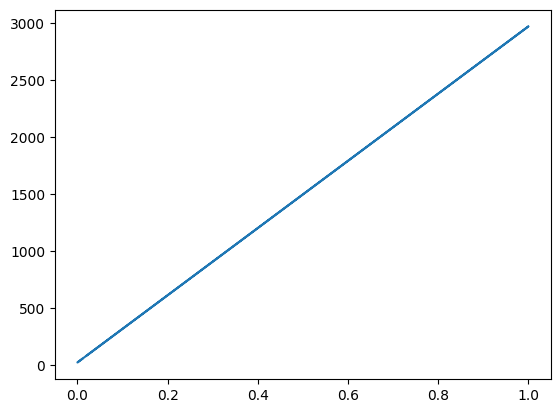

In [19]:
# Epoch 15000: theta_1 = 2948.7297, theta_0 = 24.5391, MSE = 15113.4586
t = 2948.7297*X_scaled_normalized + 24.5391
plt.plot(X_scaled_normalized,t)

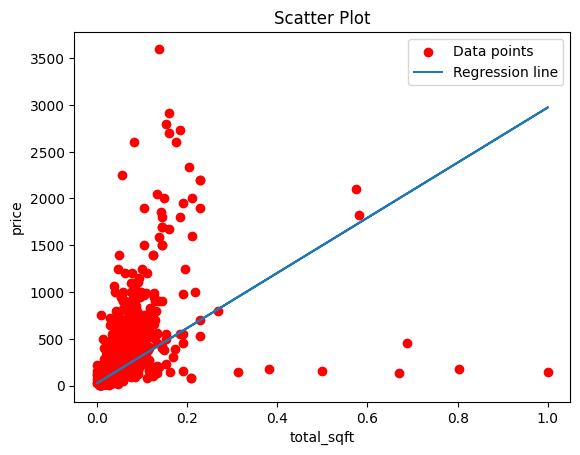

In [20]:
# Scatter plot
plt.scatter(X_scaled_normalized, Y, label='Data points',color="red")
plt.plot(X_scaled_normalized_1d,t,label="Regression line")
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.title('Scatter Plot')
plt.legend()
# plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

# Exercise 4: 

Splitting data into the training and testing, 60:40, 70:30, ND 80:20.

In [21]:
from sklearn.model_selection import train_test_split

# Split data into 60% training, 40% testing
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X_scaled_normalized, Y, test_size=0.4, random_state=42)

# Split data into 70% training, 30% testing
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_scaled_normalized, Y, test_size=0.3, random_state=42)

# Split data into 80% training, 20% testing
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_scaled_normalized, Y, test_size=0.2, random_state=42)


In [22]:
X_train_60.shape

(7964, 1)

In [23]:
X_train_70.shape

(9291, 1)

In [24]:
X_train_80.shape

(10619, 1)

# Exercise 5: 

Train linear regression model and test USING Gradient Descent and using the library. Find out the limitation in both cases.

# Using linear regression model

Mean Absolute Error: 52.90119654892372
Mean Squared Error: 15265.3179826779
Root Mean Squared Error: 123.55289548479995
R-squared: 0.379213025000084


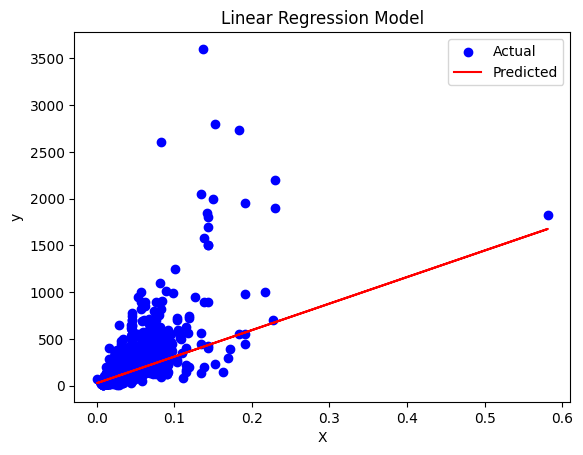

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the linear regression model
model_60 = LinearRegression()
model_60.fit(X_train_60, y_train_60)

# Make predictions on the test set
y_pred_60 = model_60.predict(X_test_60)

# Calculate evaluation metrics
mae_60 = mean_absolute_error(y_test_60, y_pred_60)
mse_60 = mean_squared_error(y_test_60, y_pred_60)
rmse_60 = np.sqrt(mse_60)
r2_60 = r2_score(y_test_60, y_pred_60)

# Print the evaluation metrics
print("Mean Absolute Error:", mae_60)
print("Mean Squared Error:", mse_60)
print("Root Mean Squared Error:", rmse_60)
print("R-squared:", r2_60)

# Plot the predictions against the actual values
plt.scatter(X_test_60, y_test_60, color='blue', label='Actual')
plt.plot(X_test_60, y_pred_60, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

Mean Absolute Error: 53.000425135642935
Mean Squared Error: 17134.403753767936
Root Mean Squared Error: 130.89844824812835
R-squared: 0.38321360518377434


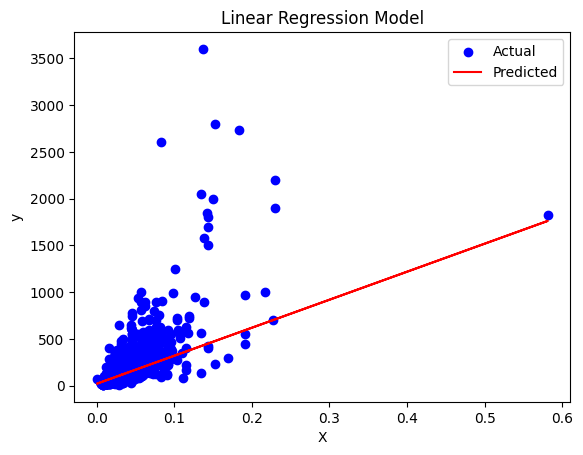

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the linear regression model
model_70 = LinearRegression()
model_70.fit(X_train_70, y_train_70)

# Make predictions on the test set
y_pred_70 = model_70.predict(X_test_70)

# Calculate evaluation metrics
mae_70 = mean_absolute_error(y_test_70, y_pred_70)
mse_70 = mean_squared_error(y_test_70, y_pred_70)
rmse_70 = np.sqrt(mse_70)
r2_70 = r2_score(y_test_70, y_pred_70)

# Print the evaluation metrics
print("Mean Absolute Error:", mae_70)
print("Mean Squared Error:", mse_70)
print("Root Mean Squared Error:", rmse_70)
print("R-squared:", r2_70)

# Plot the predictions against the actual values
plt.scatter(X_test_70, y_test_70, color='blue', label='Actual')
plt.plot(X_test_70, y_pred_70, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

Mean Absolute Error: 52.91286381194323
Mean Squared Error: 18267.96856992728
Root Mean Squared Error: 135.1590491603403
R-squared: 0.39809739068780714


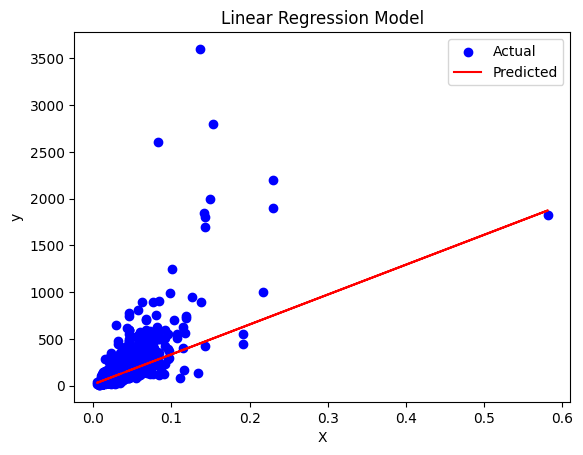

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the linear regression model
model_80 = LinearRegression()
model_80.fit(X_train_80, y_train_80)

# Make predictions on the test set
y_pred_80 = model_80.predict(X_test_80)

# Calculate evaluation metrics
mae_80 = mean_absolute_error(y_test_80, y_pred_80)
mse_80 = mean_squared_error(y_test_80, y_pred_80)
rmse_80 = np.sqrt(mse_80)
r2_80 = r2_score(y_test_80, y_pred_80)

# Print the evaluation metrics
print("Mean Absolute Error:", mae_80)
print("Mean Squared Error:", mse_80)
print("Root Mean Squared Error:", rmse_80)
print("R-squared:", r2_80)

# Plot the predictions against the actual values
plt.scatter(X_test_80, y_test_80, color='blue', label='Actual')
plt.plot(X_test_80, y_pred_80, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

lower values of Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) are better, while a higher value of R-squared indicates a better fit of the model to the data.

For the 60-40 split:
MAE: 52.901
MSE: 15265.318
RMSE: 123.553
R-squared: 0.379

For the 70-30 split:
MAE: 53.000
MSE: 17134.404
RMSE: 130.898
R-squared: 0.383

For the 80-20 split:
MAE: 52.913
MSE: 18267.969
RMSE: 135.159
R-squared: 0.398

Among these split ratios, the 80-20 split has the lowest MAE, MSE, and RMSE, indicating that the model's predictions are closer to the actual values on average. Additionally, the 80-20 split has the highest R-squared value, indicating a better fit of the model to the data compared to the other splits.

Based on these metrics, the 80-20 split appears to be the best performing among the three evaluated splits.

# Using gradient descent function

for 60 - 40 split : 

Epoch 15000: theta_1 = 2467.1099, theta_0 = 38.2478, MSE = 15260.1872
Mean Absolute Error: 55.08102325988341
Mean Squared Error: 16128.906871381385
Root Mean Squared Error: 126.99963335136596
R-squared: 0.3440938919122496


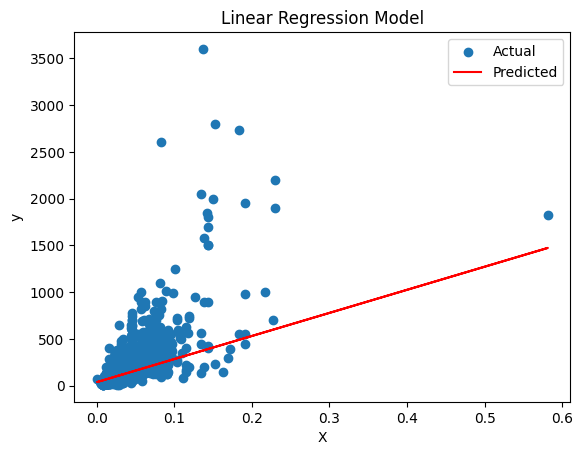

for 70 - 30 split : 

Epoch 15000: theta_1 = 2538.0282, theta_0 = 35.4323, MSE = 14333.7329
Mean Absolute Error: 55.63013599923581
Mean Squared Error: 18287.257368709972
Root Mean Squared Error: 135.23038626251858
R-squared: 0.3417143832015338


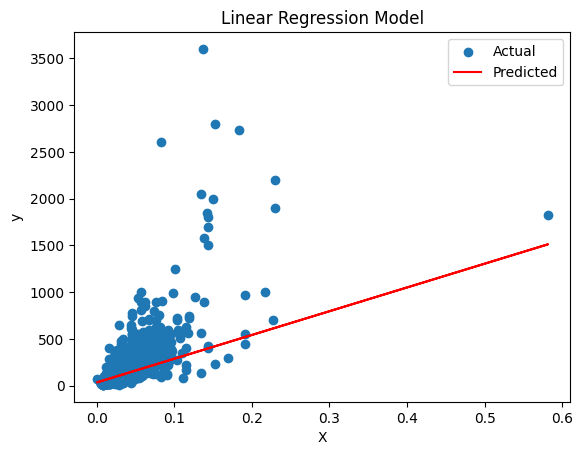

for 80 - 20 split : 

Epoch 15000: theta_1 = 2653.9567, theta_0 = 32.2244, MSE = 14309.6776
Mean Absolute Error: 55.98013227041881
Mean Squared Error: 19690.828563999654
Root Mean Squared Error: 140.32401278469646
R-squared: 0.3512162533659522


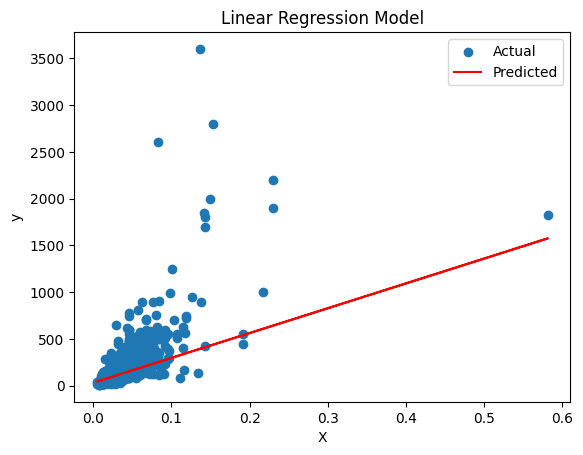

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define your gradient descent function
def gradient_descent4(X, Y):
    theta_1=0
    theta_0=0

    l =0.1 #learning rate
    epochs = 15000 #number of iterations

    n = float(len(X))

    # printing gradient descent
    for i in range(epochs):
        Y_pred = theta_1*X + theta_0 
        
        # Calculate the Mean Squared Error (MSE)
        mse = (1/n) * sum((Y - Y_pred)**2)
        
        D_theta_1 = (-2/n)*sum(X*(Y-Y_pred))
        D_theta_0 = (-2/n)*sum(Y-Y_pred)
        theta_1 = theta_1 - l * D_theta_1
        theta_0 = theta_0 - l * D_theta_0
    print("Epoch {}: theta_1 = {:.4f}, theta_0 = {:.4f}, MSE = {:.4f}".format(i + 1, theta_1, theta_0, mse))
    return theta_0, theta_1

# # Define train-test split ratios
# split_ratios = [0.6, 0.7, 0.8]

def evaluate_model(X_train, y_train, X_test, y_test):
    # Run your gradient descent function and get updated coefficients
    theta_0, theta_1 = gradient_descent4(X_train, y_train)
    
    # Initialize and train the linear regression model with your gradient descent coefficients
    model = LinearRegression()
    model.coef_ = np.array([theta_1])  # Set your gradient descent coefficients
    model.intercept_ = np.array([theta_0])

    # Make predictions on the test set
    y_pred = model.predict(X_test.reshape(-1, 1))

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R-squared:", r2)

    # Plot the predictions against the actual values
    plt.scatter(X_test, y_test, label='Actual')
    plt.plot(X_test, y_pred, color='red', label='Predicted')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression Model')
    plt.legend()
    plt.show()
    
for i in [60,70,80]:
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_scaled_normalized_1d, Y, test_size=(100-i)/100, random_state=42)
    print("for",i,"-",100-i,"split : ")
    print()
    evaluate_model(X_train_i, y_train_i, X_test_i, y_test_i)
    print("=" * 50)


Key Observations and Differences:

The library-based linear regression generally outperforms the gradient descent-based linear regression in terms of the evaluation metrics (lower MAE, MSE, and RMSE, and higher R-squared).
The R-squared values indicate that the library-based linear regression models explain a higher proportion of the variance in the target variable compared to the gradient descent-based models.
The gradient descent-based models have higher errors (both absolute and squared) and lower R-squared values, suggesting that they may not fit the data as well as the library-based models.
The performance gap between the library-based and gradient descent-based models appears to be consistent across different train-test split ratios.
Overall, the results suggest that the library-based linear regression models are more effective in capturing the underlying relationships in the data and providing better predictive performance compared to the gradient descent-based models that you implemented. This underscores the importance of using well-established and optimized algorithms provided by machine learning libraries for building accurate and reliable models.